In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats

# Reading Raw csv files of both Business as well as Economy class:

In [2]:
df_Business = pd.read_excel("buisness.csv.xls")
df_Business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...,...
16378,2022-03-02,Air India,AI,868,18:00:00,Delhi,16h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:55:00,Chennai,45257
16379,2022-03-02,Air India,AI,441,17:50:00,Delhi,17h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,10:55:00,Chennai,45257
16380,2022-03-02,Air India,AI,636,14:30:00,Delhi,20h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,10:55:00,Chennai,45257
16381,2022-03-02,Air India,AI,678,09:00:00,Delhi,22h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:20:00,Chennai,45257


In [3]:
df_Economy = pd.read_excel("economy.csv.xls")
df_Economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...,...
16378,2022-03-14,Indigo,6E,654,18:20:00,Delhi,02h 55m,non-stop,21:15:00,Bangalore,4500
16379,2022-03-14,Indigo,6E,2131,21:25:00,Delhi,02h 55m,non-stop,00:20:00,Bangalore,4500
16380,2022-03-14,Indigo,6E,2036,22:50:00,Delhi,02h 55m,non-stop,01:45:00,Bangalore,4500
16381,2022-03-14,Indigo,6E,2028,15:30:00,Delhi,03h 00m,non-stop,18:30:00,Bangalore,4500


In [4]:
df_Business.shape

(16383, 11)

In [5]:
df_Economy.shape

(16383, 11)

In [6]:
df_Business.insert(loc=7,column = 'Class',value='Business')

In [7]:
df_Economy.insert(loc=7,column = 'Class',value='Economy')

In [8]:
df_Business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,Business,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,Business,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [9]:
df_Economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,Economy,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,Economy,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,Economy,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,Economy,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,Economy,non-stop,11:10:00,Mumbai,5955


# 2. Concatinating Business as well as Econonmy datasets:

In [10]:
df_full=pd.concat([df_Economy,df_Business]) 
df_full.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
16378,2022-03-02,Air India,AI,868,18:00:00,Delhi,16h 55m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:55:00,Chennai,45257
16379,2022-03-02,Air India,AI,441,17:50:00,Delhi,17h 05m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,10:55:00,Chennai,45257
16380,2022-03-02,Air India,AI,636,14:30:00,Delhi,20h 25m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,10:55:00,Chennai,45257
16381,2022-03-02,Air India,AI,678,09:00:00,Delhi,22h 20m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:20:00,Chennai,45257
16382,2022-03-02,Air India,AI,665,08:00:00,Delhi,23h 20m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:20:00,Chennai,45257


# 3. Data Manipulation:

In [11]:
df_full['route']=df_full['from'].astype(str)+'-'+df_full['to'].astype(str)
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,Economy,non-stop,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,Economy,non-stop,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,Economy,non-stop,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,Economy,non-stop,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,Economy,non-stop,11:10:00,Mumbai,5955,Delhi-Mumbai


In [12]:
df_full['route']=df_full['from'].astype(str)+'-'+df_full['to'].astype(str)

In [13]:
Route = {
'Delhi-Mumbai':'1148', 'Delhi-Bangalore':'1740', 'Delhi-Kolkata':'1305',
       'Delhi-Hyderabad':'1253', 'Delhi-Chennai':'1757', 'Mumbai-Delhi':'1137',
       'Mumbai-Bangalore':'845', 'Mumbai-Kolkata':'1652', 'Mumbai-Hyderabad':'617',
       'Mumbai-Chennai':'1031', 'Bangalore-Delhi':'1740', 'Bangalore-Mumbai':'833',
       'Bangalore-Kolkata':'970', 'Bangalore-Hyderabad':'453', 'Bangalore-Chennai':'289',
       'Kolkata-Delhi':'1305', 'Kolkata-Mumbai':'1652', 'Kolkata-Bangalore':'1560',
       'Kolkata-Hyderabad':'1180', 'Kolkata-Chennai':'1383', 'Hyderabad-Delhi':'1264',
       'Hyderabad-Mumbai':'621', 'Hyderabad-Bangalore':'453', 'Hyderabad-Kolkata':'1209',
       'Hyderabad-Chennai':'507', 'Chennai-Delhi':'1760', 'Chennai-Mumbai':'1031',
       'Chennai-Bangalore':'268', 'Chennai-Kolkata':'1383', 'Chennai-Hyderabad':'514'
}

In [14]:
df_full['Distance'] = df_full['route'].map(Route)

In [15]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,Economy,non-stop,21:05:00,Mumbai,5953,Delhi-Mumbai,1148
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,Economy,non-stop,08:40:00,Mumbai,5953,Delhi-Mumbai,1148
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,Economy,non-stop,06:35:00,Mumbai,5956,Delhi-Mumbai,1148
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,Economy,non-stop,12:35:00,Mumbai,5955,Delhi-Mumbai,1148
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,Economy,non-stop,11:10:00,Mumbai,5955,Delhi-Mumbai,1148


In [16]:
df_full['Distance']=df_full['Distance'].astype(int)

In [17]:
df_full.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
Class         0
stop          0
arr_time      0
to            0
price         0
route         0
Distance      0
dtype: int64

In [18]:
df_full['Distance'].value_counts()

1148    15291
1740    10267
1305     3280
1253     2747
1757     1181
Name: Distance, dtype: int64

In [19]:
#But there are majority of stops that are missing. As a result of which distances may be mostly inaccurate. 
#So its better not to consider distance for ourfuture analysis.

In [20]:
df_full.drop('Distance',axis=1,inplace=True)

# 4. Data Cleaning

In [21]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,Economy,non-stop,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,Economy,non-stop,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,Economy,non-stop,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,Economy,non-stop,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,Economy,non-stop,11:10:00,Mumbai,5955,Delhi-Mumbai


In [22]:
df_full['date']=df_full['date'].astype('object')

In [23]:
df_full['stop']=df_full['stop'].str.split('\n').str[0]

In [24]:
df_full['stop'].unique()

array(['non-stop ', '1-stop', '2+-stop'], dtype=object)

In [25]:
#Again manipulating the stop column:
df_full['stop']=df_full['stop'].replace('2+-stop','2-stop')

In [26]:
df_full['stop']=df_full['stop'].replace('non-stop','0-stop')

In [27]:
df_full['stop'].unique()

array(['non-stop ', '1-stop', '2-stop'], dtype=object)

In [28]:
df_full['stop'] = df_full['stop'].str.split('-').str[0]

In [29]:
df_full['stop'].unique()

array(['non', '1', '2'], dtype=object)

In [30]:
df_full['stop']=df_full['stop'].str.replace('non','0')

In [31]:
df_full['stop'].unique()

array(['0', '1', '2'], dtype=object)

In [32]:
df_full['time_taken'].value_counts()

02h 10m    1722
02h 15m    1145
02h 45m     844
02h 20m     820
02h 05m     556
           ... 
21h 45m       1
10h 45m       1
26h 15m       1
03h 05m       1
18h 45m       1
Name: time_taken, Length: 327, dtype: int64

In [33]:
#Manipulating the time_taken column:
df_full['time_taken']=df_full['time_taken'].str.replace(' ','.')
df_full['time_taken']=df_full['time_taken'].str.replace('h','')
df_full['time_taken']=df_full['time_taken'].str.replace('m','')

In [34]:
df_full['time_taken']=df_full['time_taken'].str.replace('1.01.','1.01')
df_full['time_taken']=df_full['time_taken'].str.replace('1.02.','1.02')
df_full['time_taken']=df_full['time_taken'].str.replace('1.03.','1.03')

In [35]:
#Changing dtype of time_taken to float:
df_full['time_taken']=df_full['time_taken'].astype(float)

In [36]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11 00:00:00,SpiceJet,SG,8709,18:55:00,Delhi,2.10,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11 00:00:00,SpiceJet,SG,8157,06:20:00,Delhi,2.20,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11 00:00:00,AirAsia,I5,764,04:25:00,Delhi,2.10,Economy,0,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11 00:00:00,Vistara,UK,995,10:20:00,Delhi,2.15,Economy,0,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11 00:00:00,Vistara,UK,963,08:50:00,Delhi,2.20,Economy,0,11:10:00,Mumbai,5955,Delhi-Mumbai


In [37]:
# Concatenated ch_code and num_code for the better understanding
flight_cd=df_full['ch_code'].astype(str)+'-'+df_full['num_code'].astype(str)

In [38]:
df_full.insert(loc=3,column = 'Flight_code',value=flight_cd)

In [39]:
df_full.head()

,date,airline,ch_code,Flight_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11 00:00:00,SpiceJet,SG,SG-8709,8709,18:55:00,Delhi,2.10,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11 00:00:00,SpiceJet,SG,SG-8157,8157,06:20:00,Delhi,2.20,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11 00:00:00,AirAsia,I5,I5-764,764,04:25:00,Delhi,2.10,Economy,0,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11 00:00:00,Vistara,UK,UK-995,995,10:20:00,Delhi,2.15,Economy,0,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11 00:00:00,Vistara,UK,UK-963,963,08:50:00,Delhi,2.20,Economy,0,11:10:00,Mumbai,5955,Delhi-Mumbai


In [40]:
df_full.drop(['ch_code','num_code'],axis=1,inplace=True)

In [41]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11 00:00:00,SpiceJet,SG-8709,18:55:00,Delhi,2.10,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11 00:00:00,SpiceJet,SG-8157,06:20:00,Delhi,2.20,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11 00:00:00,AirAsia,I5-764,04:25:00,Delhi,2.10,Economy,0,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11 00:00:00,Vistara,UK-995,10:20:00,Delhi,2.15,Economy,0,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11 00:00:00,Vistara,UK-963,08:50:00,Delhi,2.20,Economy,0,11:10:00,Mumbai,5955,Delhi-Mumbai


In [42]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32766 entries, 0 to 16382
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         32766 non-null  object 
 1   airline      32766 non-null  object 
 2   Flight_code  32766 non-null  object 
 3   dep_time     32766 non-null  object 
 4   from         32766 non-null  object 
 5   time_taken   32766 non-null  float64
 6   Class        32766 non-null  object 
 7   stop         32766 non-null  object 
 8   arr_time     32766 non-null  object 
 9   to           32766 non-null  object 
 10  price        32766 non-null  int64  
 11  route        32766 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.2+ MB


Here Target variable price is numerical in nature, So lets Do some Analysis

In [43]:
df_full.describe(include='object')

,date,airline,Flight_code,dep_time,from,Class,stop,arr_time,to,route
count,32766,32766,32766,32766,32766,32766,32766,32766,32766,32766
unique,49,6,345,181,1,2,3,218,5,5
top,2022-02-28 00:00:00,Vistara,UK-995,07:30:00,Delhi,Economy,1,20:55:00,Mumbai,Delhi-Mumbai
freq,847,14550,615,1123,32766,16383,25844,1139,15291,15291


In [44]:
df_full.describe(include='int')

,price
count,32766.000000
mean,27424.442379
std,23122.169636
min,2281.000000
25%,5323.000000
50%,22152.000000
75%,49177.000000
max,117307.000000


# Univariate Analysis :

<AxesSubplot:xlabel='price', ylabel='Density'>

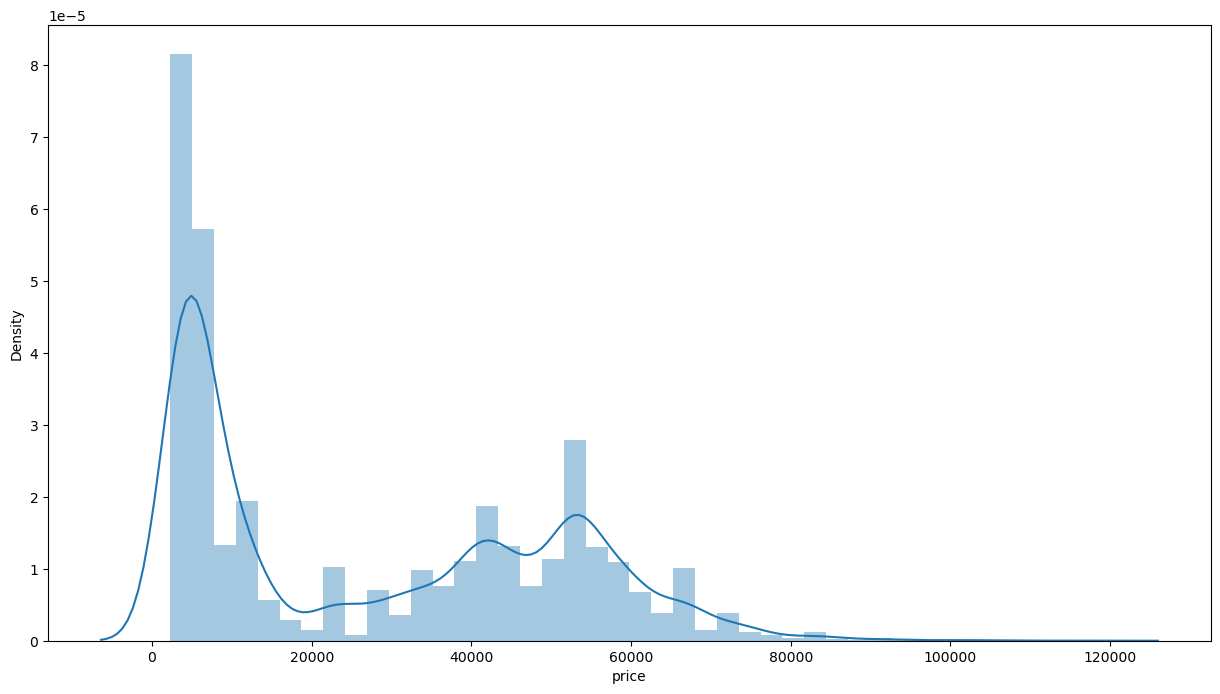

In [45]:
plt.figure(figsize=(15,8))
sns.distplot(df_full['price'],kde=True)

In [46]:
df_full['price'].skew()
# It is positively Skewed

0.43513202821200936

As shown in the above distplot,the target variable seems to be highly right skewed in nature.

In [47]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11 00:00:00,SpiceJet,SG-8709,18:55:00,Delhi,2.10,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11 00:00:00,SpiceJet,SG-8157,06:20:00,Delhi,2.20,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11 00:00:00,AirAsia,I5-764,04:25:00,Delhi,2.10,Economy,0,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11 00:00:00,Vistara,UK-995,10:20:00,Delhi,2.15,Economy,0,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11 00:00:00,Vistara,UK-963,08:50:00,Delhi,2.20,Economy,0,11:10:00,Mumbai,5955,Delhi-Mumbai


In [48]:
df_full['from'].value_counts()

Delhi    32766
Name: from, dtype: int64

In [49]:
df_full_cat=df_full[['airline','from','to','Class','stop']]

airline


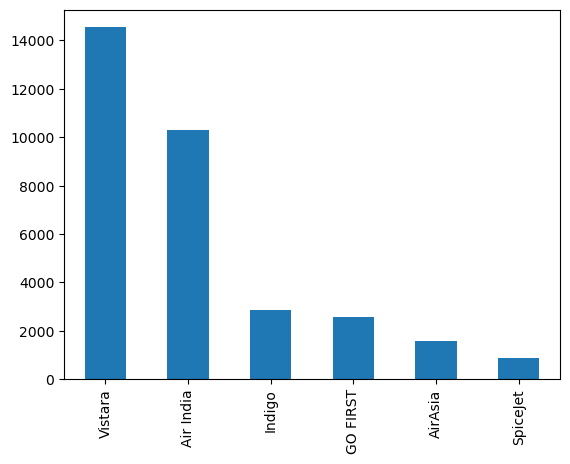

from


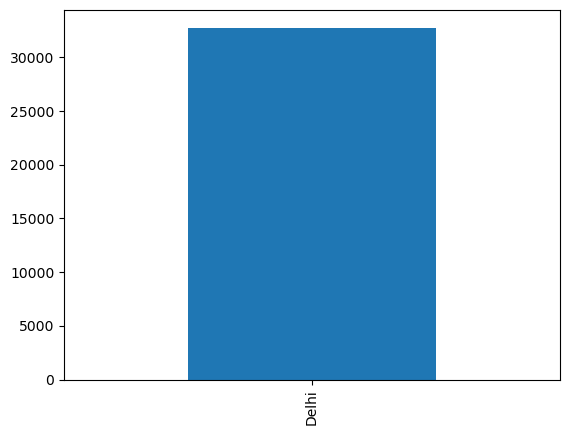

to


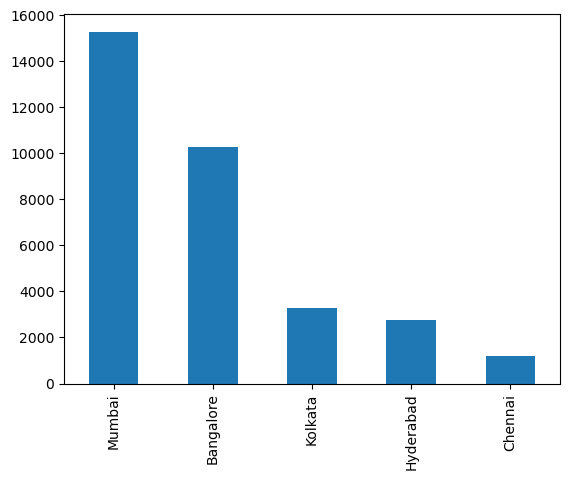

Class


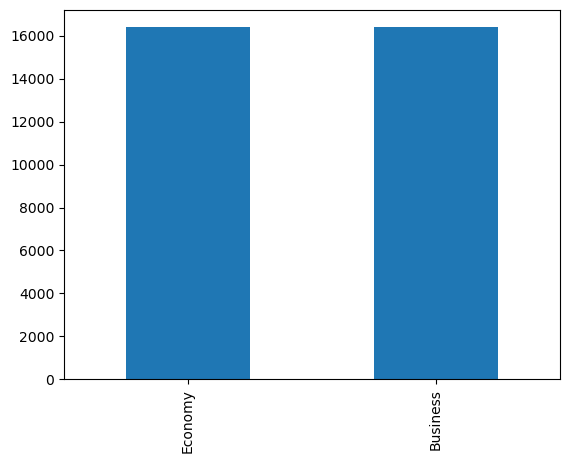

stop


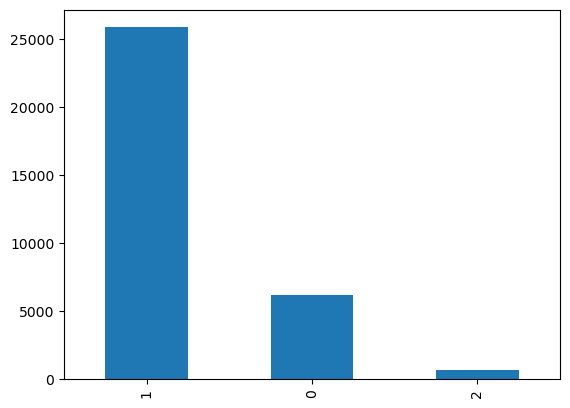

In [50]:
for i in df_full_cat.columns:
    print(i)
    df_full[i].value_counts().plot(kind='bar')
    plt.show()

#Inferences: 

1)The number of flights for vistara airlines are the highest among all. 

2)Flights running is from from Delhi 

3)Flights reaching Mumbai airport are largest in number while in chennai flights arriving are the lowest. 

4)Flights with economy classes and Buisness Class are equal

5)Majority of flights are having single stop.

# Bivariate Analysis :

In [51]:
df_full['airline'].value_counts()

Vistara      14550
Air India    10316
Indigo        2874
GO FIRST      2551
AirAsia       1586
SpiceJet       889
Name: airline, dtype: int64

In [52]:
df_full['Class'].value_counts()

Economy     16383
Business    16383
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

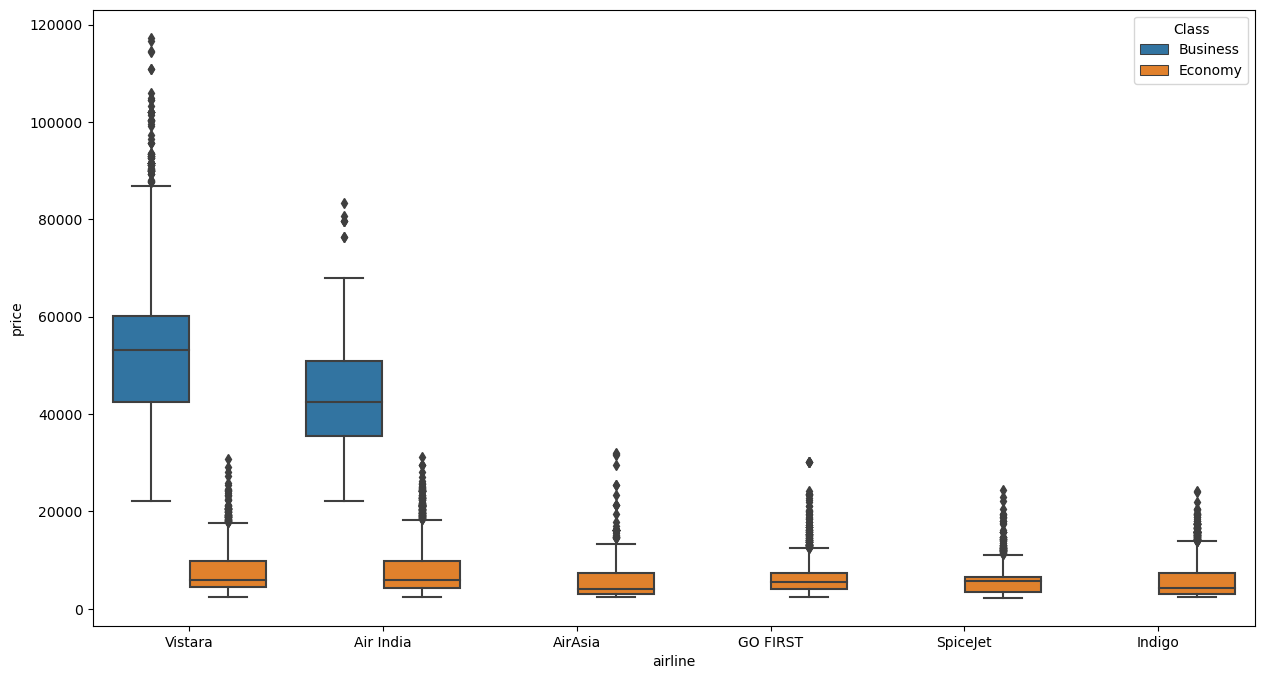

In [53]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='airline',hue='Class')
plt.show

From above boxplot,we can say that ticket price for Business class in vistara airways is most expensive.

<function matplotlib.pyplot.show(close=None, block=None)>

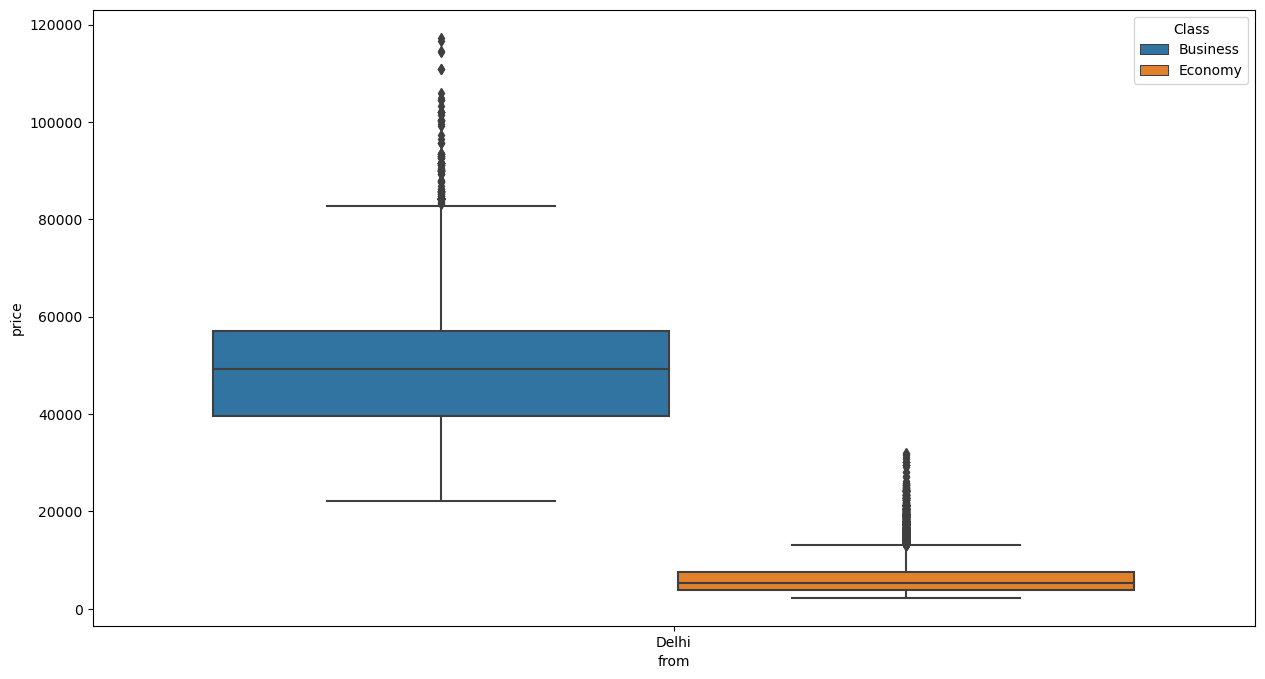

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='from',hue='Class')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

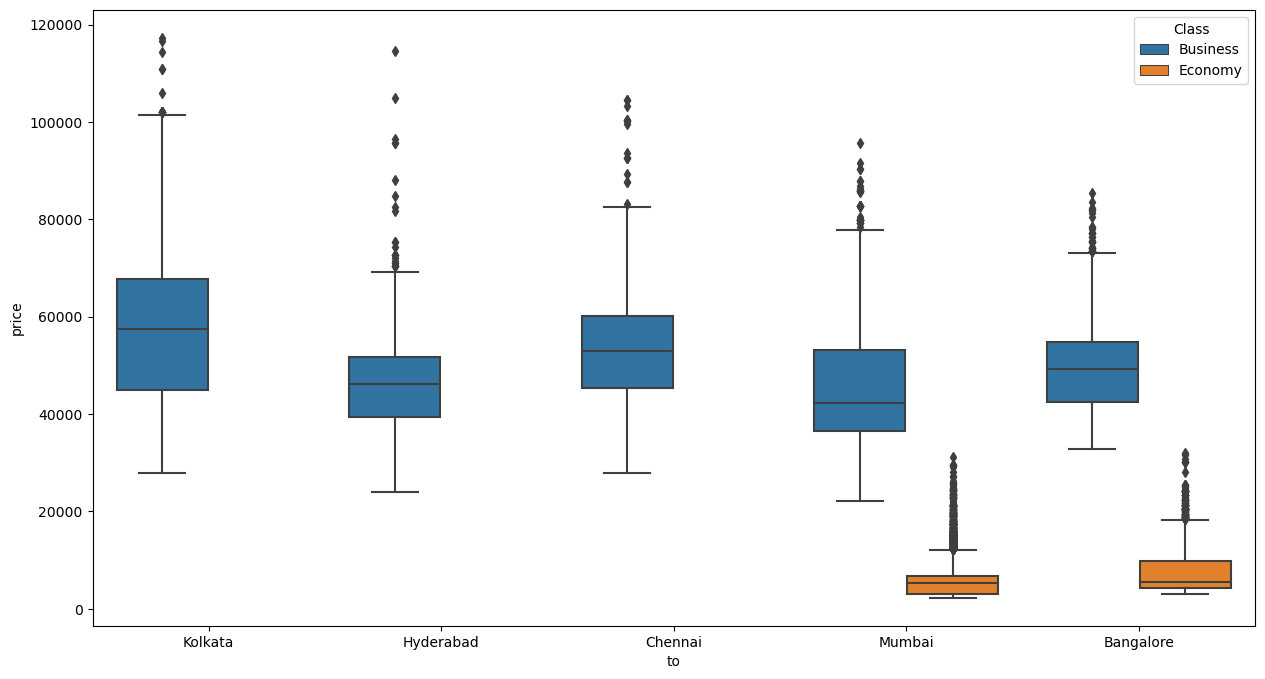

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='to',hue='Class')
plt.show

From above boxplot,we can say that ticket price is most expensive for the flights heading to Kolkata.

<function matplotlib.pyplot.show(close=None, block=None)>

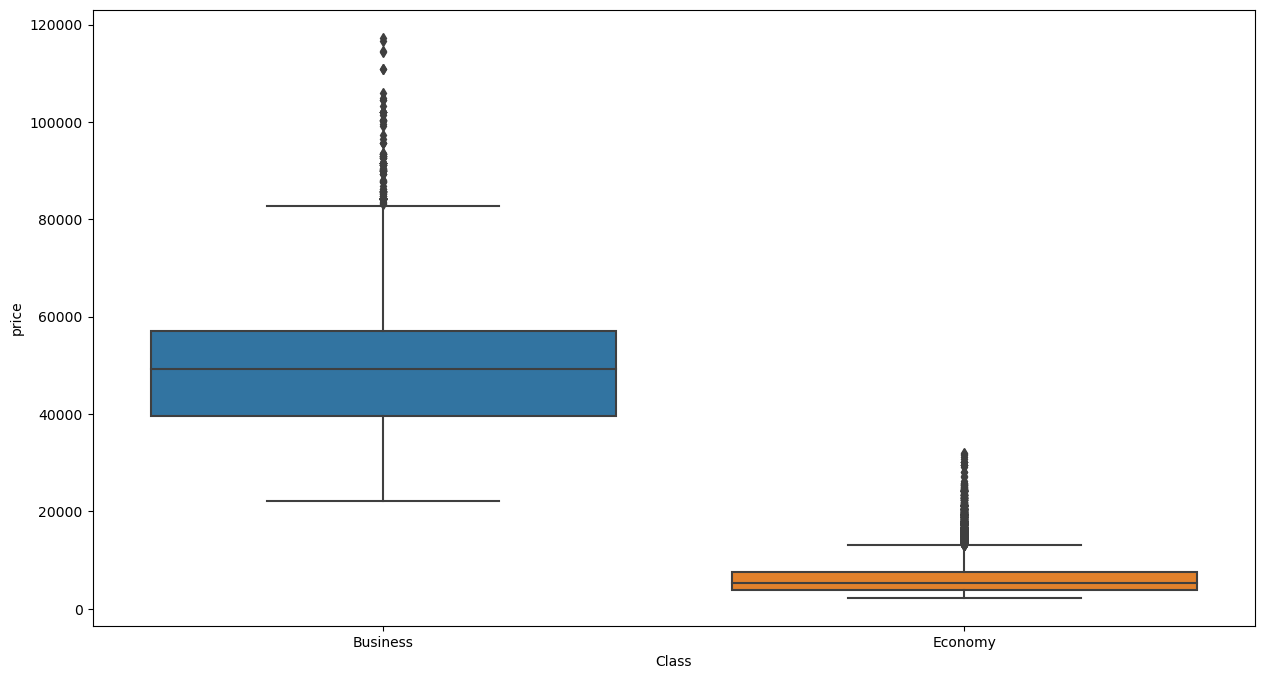

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='Class')
plt.show

Flight tickets for business class is most expensive.

<function matplotlib.pyplot.show(close=None, block=None)>

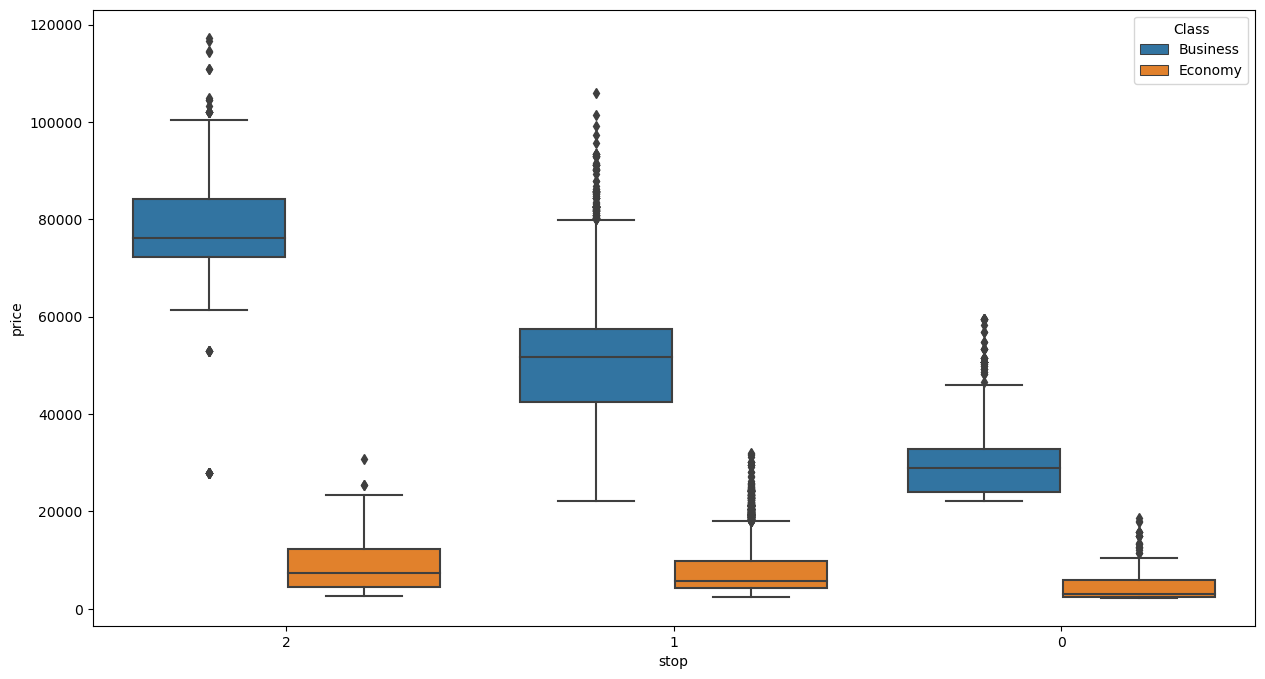

In [57]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='stop',hue='Class')
plt.show

Ticket prices are most expensive when there are only 2 stop.

In [58]:
pd.crosstab(df_full['airline'],df_full['route'])

route,Delhi-Bangalore,Delhi-Chennai,Delhi-Hyderabad,Delhi-Kolkata,Delhi-Mumbai
airline,,,,,
Air India,2418,465,1087,1337,5009
AirAsia,954,0,0,0,632
GO FIRST,901,0,0,0,1650
Indigo,1218,0,0,0,1656
SpiceJet,385,0,0,0,504
Vistara,4391,716,1660,1943,5840


We can see the max and min. number of flights corresponding to various airlines from particular
source to desired destination.

# Multivariate Analysis :

In [59]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,2022-02-11 00:00:00,SpiceJet,SG-8709,18:55:00,Delhi,2.10,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai
1,2022-02-11 00:00:00,SpiceJet,SG-8157,06:20:00,Delhi,2.20,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai
2,2022-02-11 00:00:00,AirAsia,I5-764,04:25:00,Delhi,2.10,Economy,0,06:35:00,Mumbai,5956,Delhi-Mumbai
3,2022-02-11 00:00:00,Vistara,UK-995,10:20:00,Delhi,2.15,Economy,0,12:35:00,Mumbai,5955,Delhi-Mumbai
4,2022-02-11 00:00:00,Vistara,UK-963,08:50:00,Delhi,2.20,Economy,0,11:10:00,Mumbai,5955,Delhi-Mumbai


<AxesSubplot:>

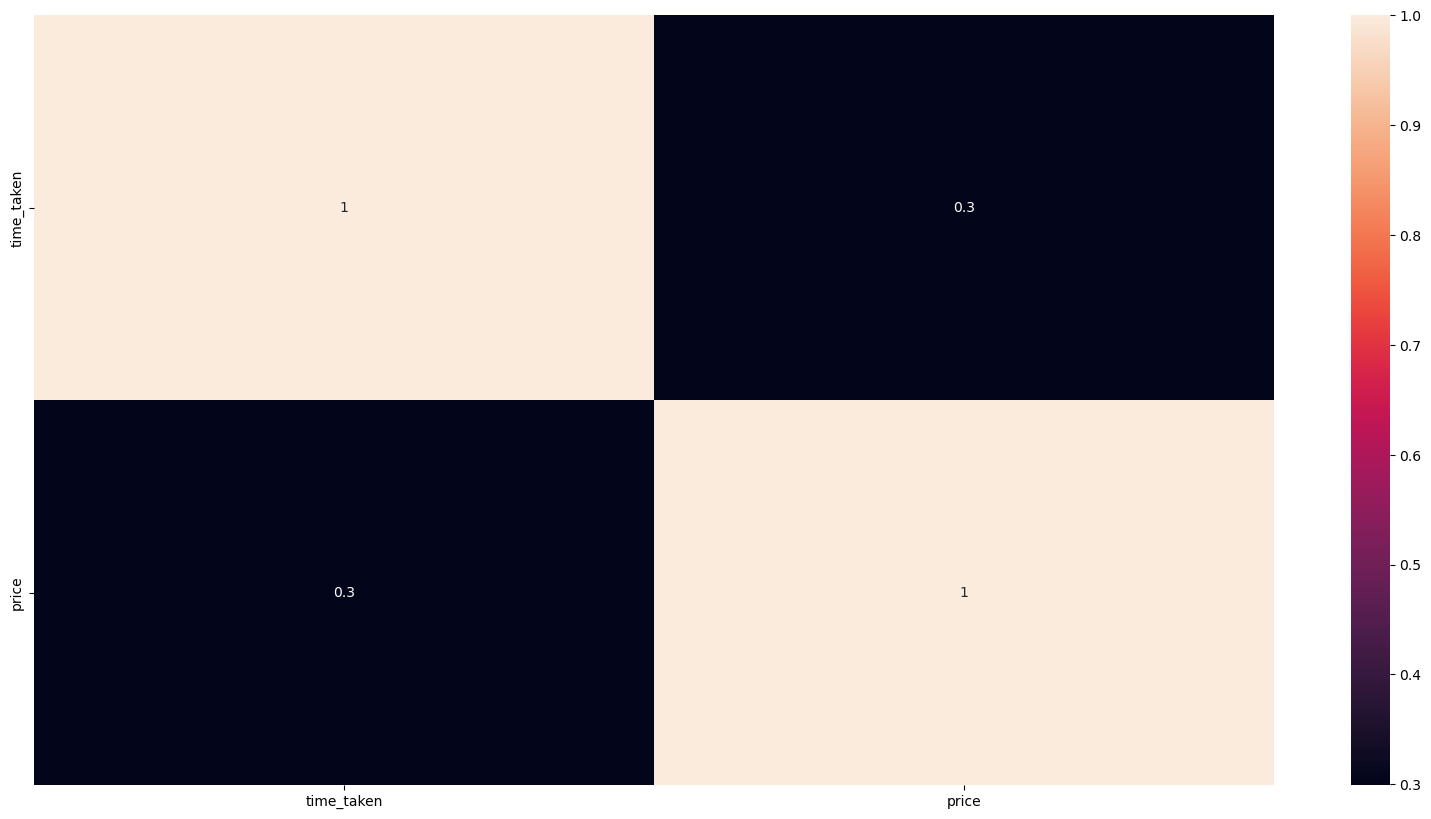

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_full.corr(),annot=True)

No Strong correlation found.

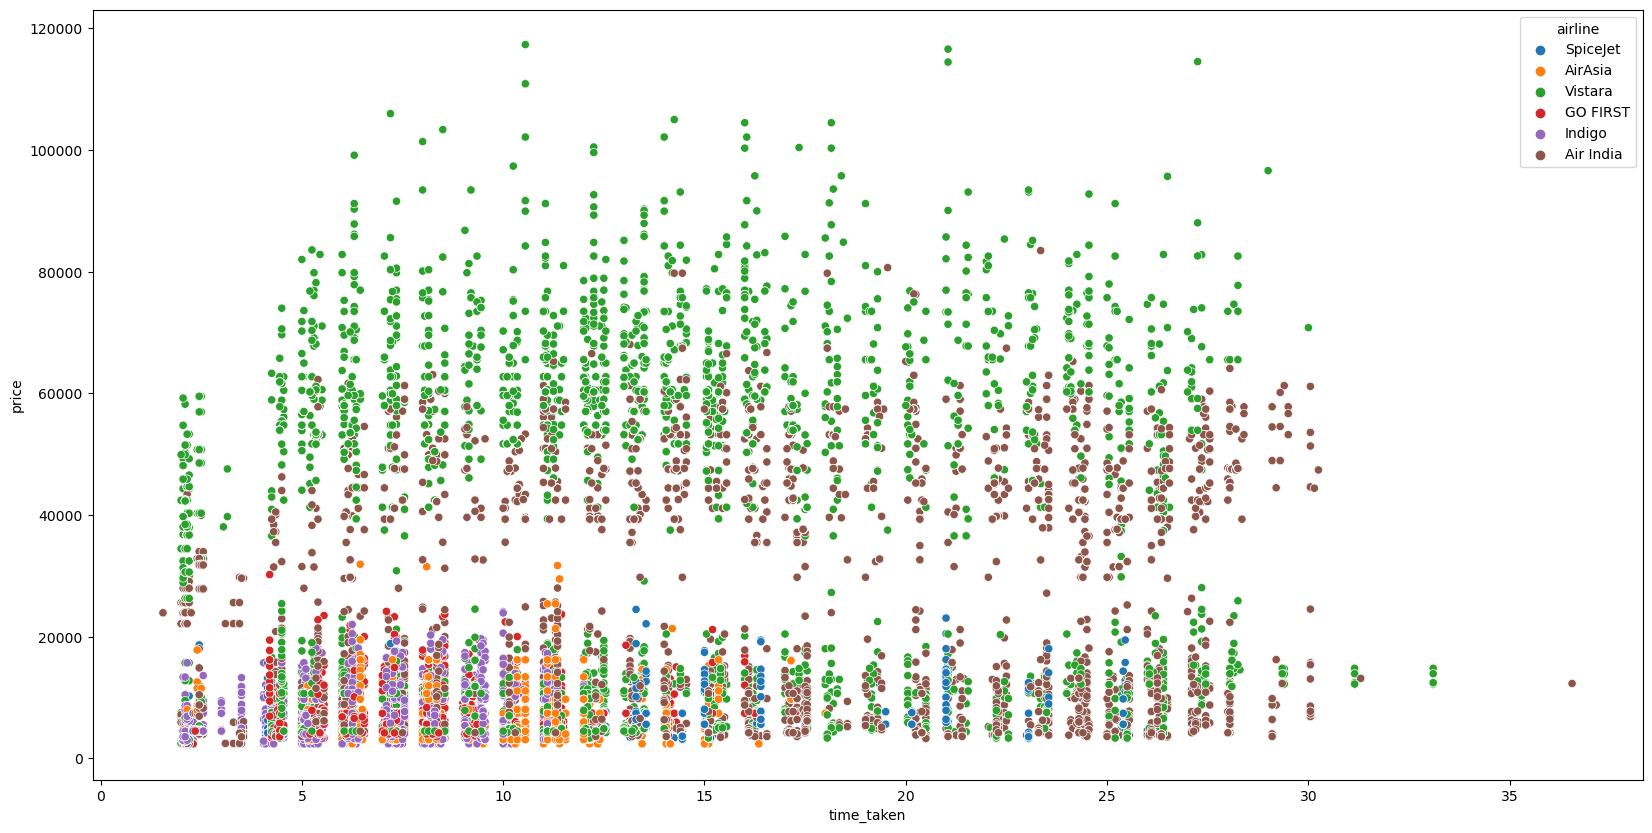

In [61]:
plt.figure(figsize=(20,10))
sns.scatterplot(df_full['time_taken'],df_full['price'],hue=df_full['airline'])
plt.show()

In [62]:
#We can see from the above scatter plot that there are many green dots which are related to Vistara,clearly signifies that
#the airline is most expensive.
#Time taken by Air India and Vistara seems to be the largest among all.

#  Missing Value :

In [63]:
df_full.isnull().sum()

date           0
airline        0
Flight_code    0
dep_time       0
from           0
time_taken     0
Class          0
stop           0
arr_time       0
to             0
price          0
route          0
dtype: int64

In [64]:
# Hence There are no missing values present.

# Feature Enjineering :

In [65]:
df_full['Day']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.day
df_full['Week']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.week
df_full['Month']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.month

In [66]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month
0,2022-02-11 00:00:00,SpiceJet,SG-8709,18:55:00,Delhi,2.10,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai,11,6,2
1,2022-02-11 00:00:00,SpiceJet,SG-8157,06:20:00,Delhi,2.20,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai,11,6,2
2,2022-02-11 00:00:00,AirAsia,I5-764,04:25:00,Delhi,2.10,Economy,0,06:35:00,Mumbai,5956,Delhi-Mumbai,11,6,2
3,2022-02-11 00:00:00,Vistara,UK-995,10:20:00,Delhi,2.15,Economy,0,12:35:00,Mumbai,5955,Delhi-Mumbai,11,6,2
4,2022-02-11 00:00:00,Vistara,UK-963,08:50:00,Delhi,2.20,Economy,0,11:10:00,Mumbai,5955,Delhi-Mumbai,11,6,2


In [67]:
# Converting to object because week is a categorical 
df_full['Week']=df_full['Week'].astype(object)

In [68]:
df_full.dtypes

date            object
airline         object
Flight_code     object
dep_time        object
from            object
time_taken     float64
Class           object
stop            object
arr_time        object
to              object
price            int64
route           object
Day              int64
Week            object
Month            int64
dtype: object

In [69]:
df_full['dep_time'] = df_full['dep_time'].astype(str)
t = df_full['dep_time'].str.split(':', expand=True)
t = t.astype(int)
t_in_minutes = t[0] * 60 + t[1]
df_full["dep_time_in_min"] = t_in_minutes

In [70]:
departure_time=[]
for i in df_full.dep_time_in_min:
    if i < 288:
        a="Early_morning"
        departure_time.append(a)
        
    elif 288<i<576:
        b="Morning"
        departure_time.append(b)
    elif 576<i<864:
        c="Afternoon"
        departure_time.append(c)
    elif 864<i<1152:
        d="Evening"
        departure_time.append(d)
    else:
        e="Midnight"
        departure_time.append(e)

In [71]:
df_full['departure_time']=departure_time
df_full.head(2)

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month,dep_time_in_min,departure_time
0,2022-02-11 00:00:00,SpiceJet,SG-8709,18:55:00,Delhi,2.1,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai,11,6,2,1135,Evening
1,2022-02-11 00:00:00,SpiceJet,SG-8157,06:20:00,Delhi,2.2,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai,11,6,2,380,Morning


In [72]:
df_full['departure_time'].value_counts()

Morning          9253
Evening          9187
Afternoon        8288
Midnight         5728
Early_morning     310
Name: departure_time, dtype: int64

In [73]:
df_full['arr_time'] = df_full['arr_time'].astype(str)
at = df_full['arr_time'].str.split(':', expand=True)
at = at.astype(int)
at_in_minutes = at[0] * 60 + at[1]
df_full['arr_time_in_min'] = at_in_minutes 

In [74]:
arrival_time=[]
for i in df_full.arr_time_in_min:
    if i < 288:
        a="Early_morning"
        arrival_time.append(a)
        
    elif 288<i<576:
        b="Morning"
        arrival_time.append(b)
    elif 576<i<864:
        c="Afternoon"
        arrival_time.append(c)
    elif 864<i<1152:
        d="Evening"
        arrival_time.append(d)
    else:
        e="Midnight"
        arrival_time.append(e)

In [75]:
df_full['arrival_time']=arrival_time
df_full.head(2)

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month,dep_time_in_min,departure_time,arr_time_in_min,arrival_time
0,2022-02-11 00:00:00,SpiceJet,SG-8709,18:55:00,Delhi,2.1,Economy,0,21:05:00,Mumbai,5953,Delhi-Mumbai,11,6,2,1135,Evening,1265,Midnight
1,2022-02-11 00:00:00,SpiceJet,SG-8157,06:20:00,Delhi,2.2,Economy,0,08:40:00,Mumbai,5953,Delhi-Mumbai,11,6,2,380,Morning,520,Morning


In [76]:
df_full['arrival_time'].value_counts()

Midnight         12533
Evening           7392
Afternoon         6705
Morning           4981
Early_morning     1155
Name: arrival_time, dtype: int64

In [77]:
df_full.drop(columns=['dep_time_in_min',"arr_time_in_min"],inplace=True)

In [78]:
df_full.drop(columns=['dep_time','arr_time'],inplace=True)

In [79]:
df_full.drop(columns='Day',inplace=True)

In [80]:
from datetime import date
import calendar

In [81]:
df_full['date_dup']=pd.to_datetime(df_full.date,format='%d-%m-%Y')

In [82]:
weekday=[]
for i in df_full['date_dup']:
    a=i.strftime('%A')
    weekday.append(a)
    

In [83]:
df_full['day_of_week']=weekday
df_full.head(2)

,date,airline,Flight_code,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,date_dup,day_of_week
0,2022-02-11 00:00:00,SpiceJet,SG-8709,Delhi,2.1,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,2022-02-11,Friday
1,2022-02-11 00:00:00,SpiceJet,SG-8157,Delhi,2.2,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,2022-02-11,Friday


In [84]:
df_full.drop(columns='date_dup',inplace=True)

In [85]:
df_full.dtypes

date               object
airline            object
Flight_code        object
from               object
time_taken        float64
Class              object
stop               object
to                 object
price               int64
route              object
Week               object
Month               int64
departure_time     object
arrival_time       object
day_of_week        object
dtype: object

In [86]:
#Now dropping all the redundant columns:
df_full.drop(['date'],axis=1,inplace=True)

In [87]:
df_full.drop(['Flight_code'],axis=1,inplace=True)

In [88]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,Delhi-Mumbai,6,2,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Morning,Afternoon,Friday


In [89]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32766 entries, 0 to 16382
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   airline         32766 non-null  object 
 1   from            32766 non-null  object 
 2   time_taken      32766 non-null  float64
 3   Class           32766 non-null  object 
 4   stop            32766 non-null  object 
 5   to              32766 non-null  object 
 6   price           32766 non-null  int64  
 7   route           32766 non-null  object 
 8   Week            32766 non-null  object 
 9   Month           32766 non-null  int64  
 10  departure_time  32766 non-null  object 
 11  arrival_time    32766 non-null  object 
 12  day_of_week     32766 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.5+ MB


<AxesSubplot:xlabel='departure_time', ylabel='price'>

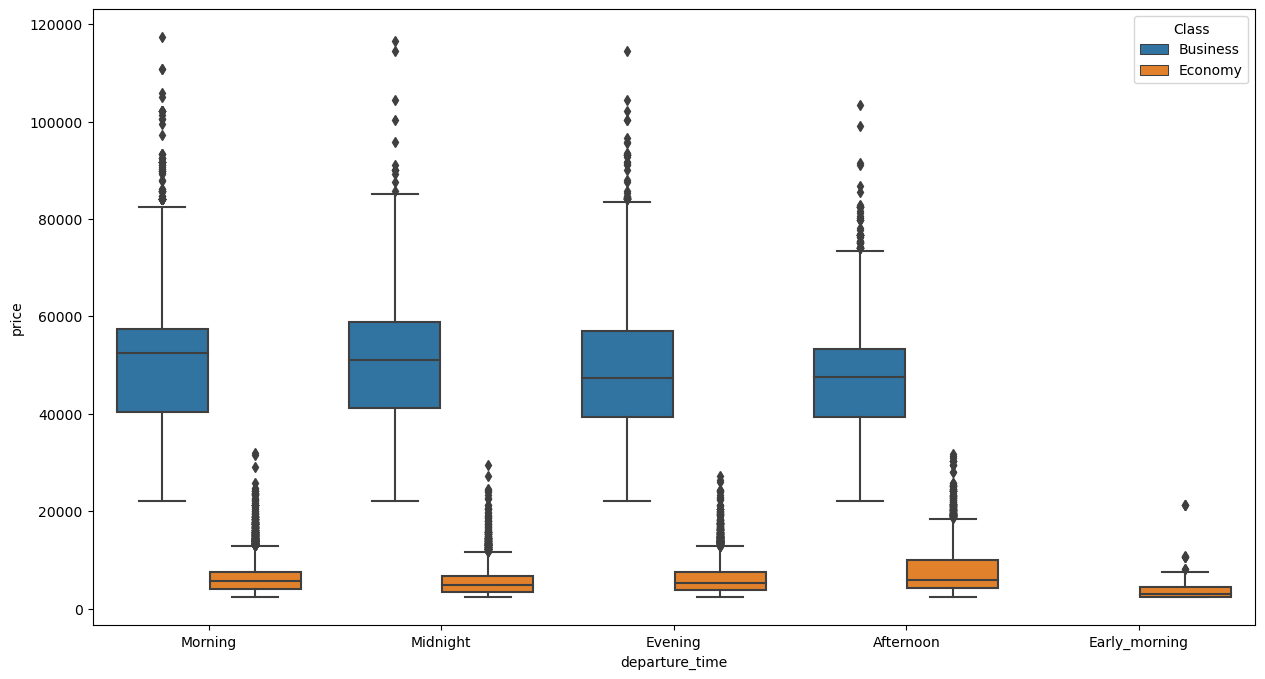

In [90]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),x='departure_time',y='price',hue='Class')

From the above plot it is very evident that Morning flights are more costly comparecd to the Early morning flights

<AxesSubplot:xlabel='day_of_week', ylabel='price'>

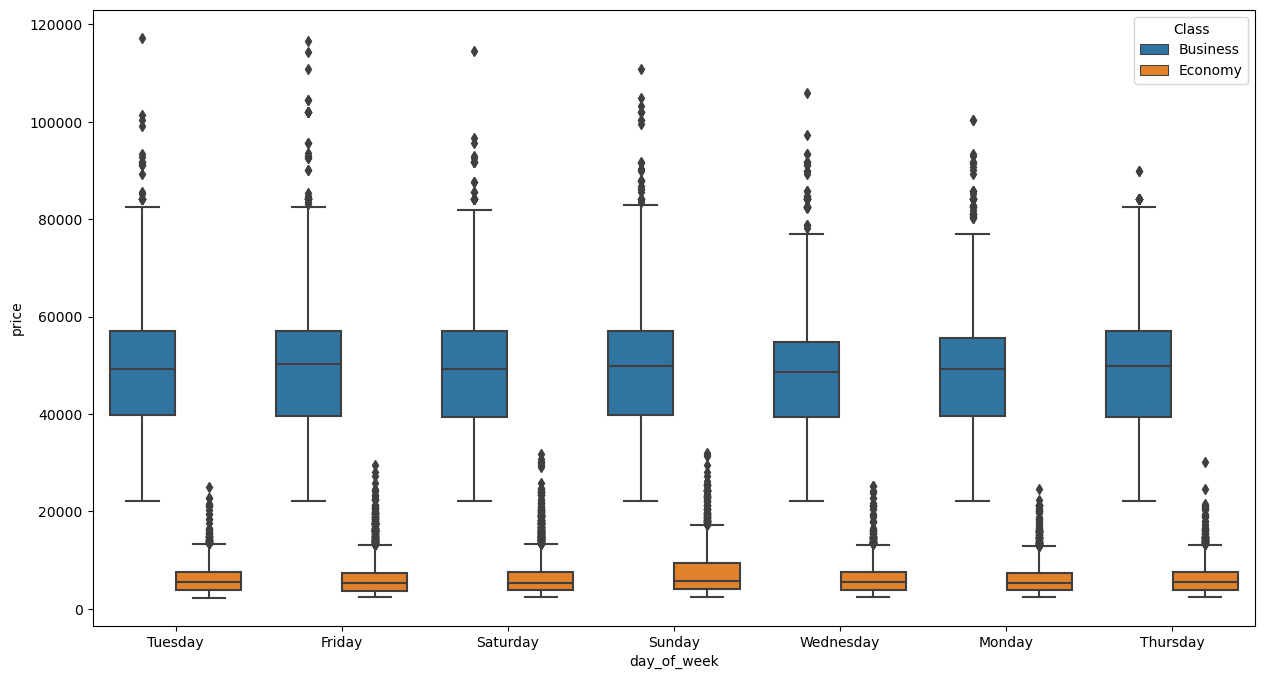

In [91]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),x='day_of_week',y='price',hue='Class')

From the above plot we can see that on Tuesdays tickets are more expensive

In [92]:
df_full_num=df_full.select_dtypes(exclude='object')

time_taken


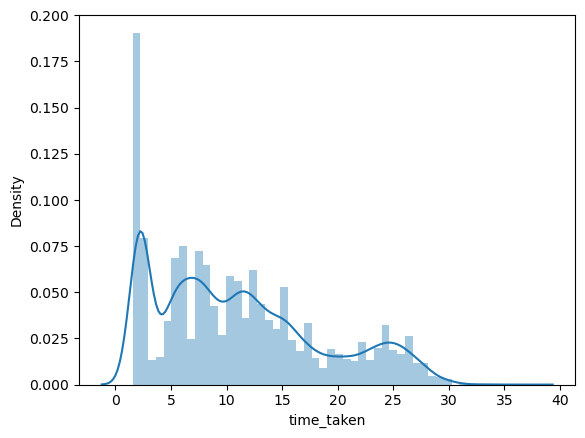

price


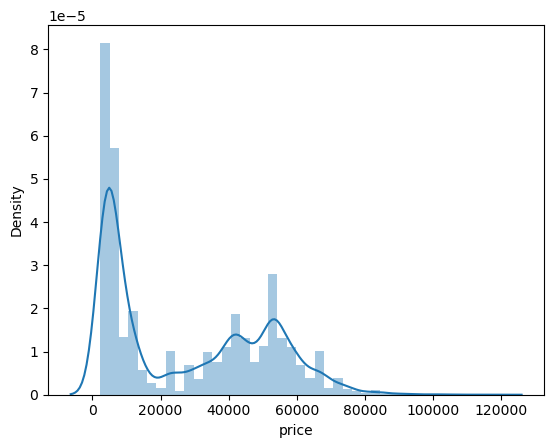

Month


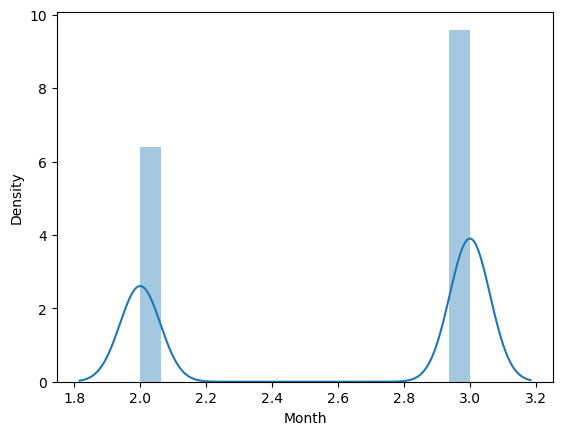

In [93]:
for i in df_full_num.columns:
    print(i)
    sns.distplot(df_full[i])
    plt.show()

<AxesSubplot:xlabel='time_taken', ylabel='price'>

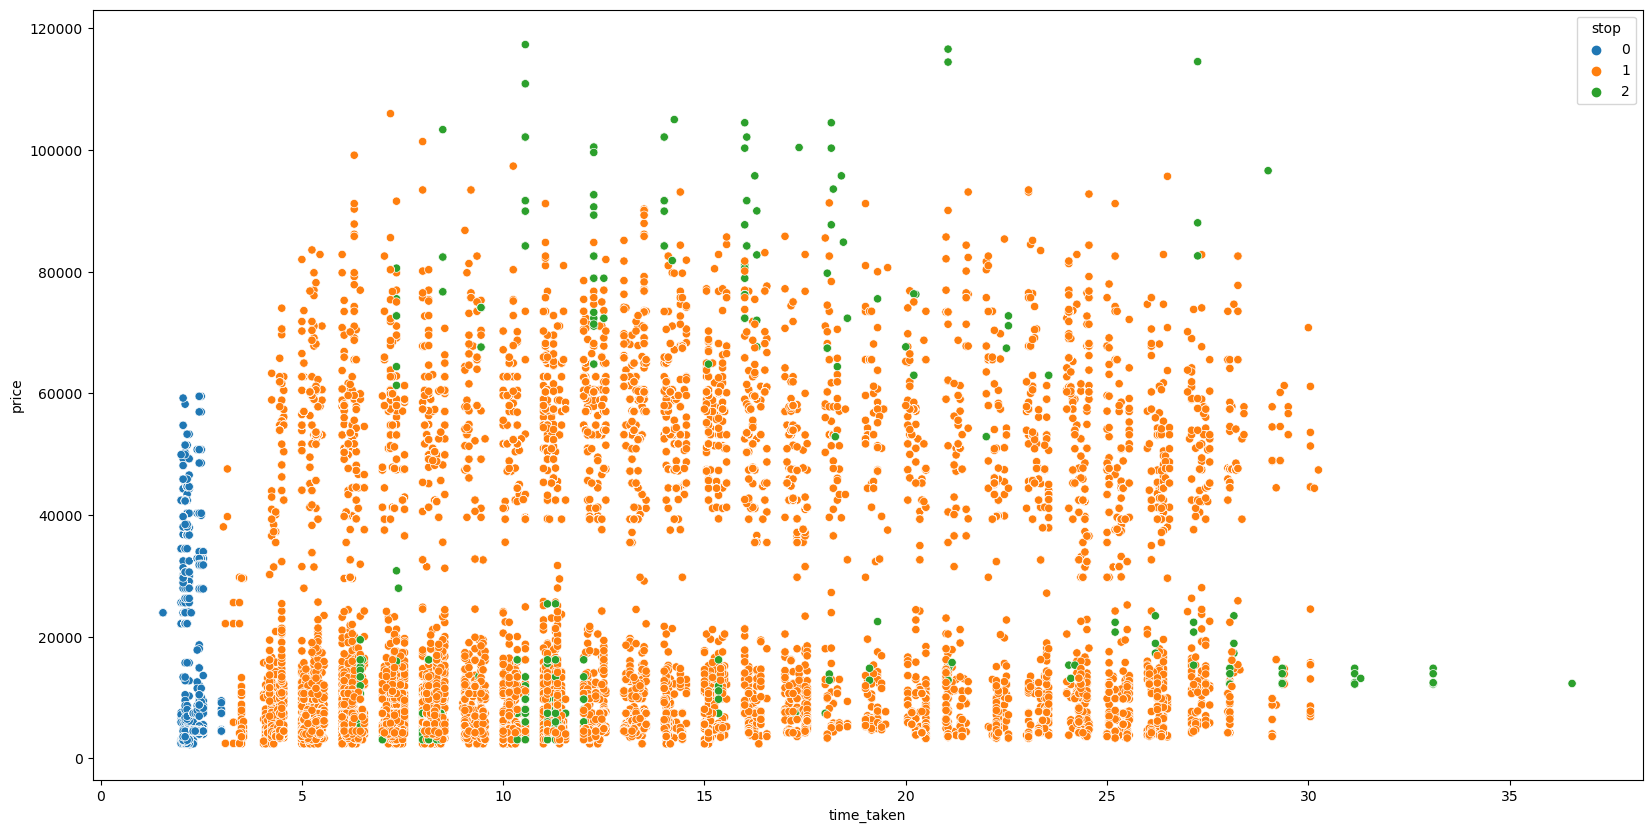

In [94]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='time_taken',y='price',data=df_full,hue='stop')

In [95]:
#From the above plot we can infer that,the maximum number of flights are having single stops only.
#Also as the time taken by the flights to reach the destination is increasing,the flight ticket fares 
#are eventually decreasing

In [96]:
df_full['time_taken'].skew()

0.6450649642553598

<AxesSubplot:xlabel='time_taken'>

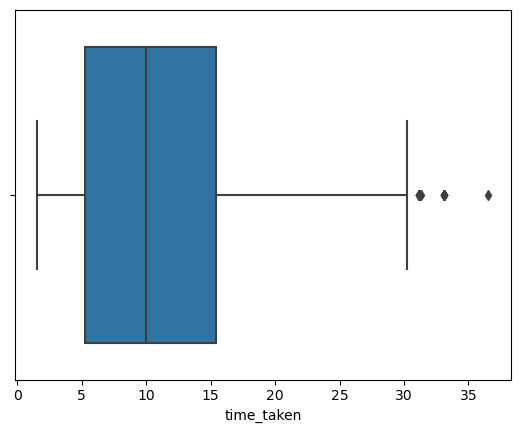

In [97]:
sns.boxplot(df_full['time_taken'])
#Though there are many outliers in time_taken column but we can't treat them because the data is an istance of real 
#life scenario.

In [98]:
for i in df_full_num.columns:
    print(i,'-',df_full[i].skew())
    

time_taken - 0.6450649642553598
price - 0.43513202821200936
Month - -0.40598339805345457


In [99]:
df_full_num.columns

Index(['time_taken', 'price', 'Month'], dtype='object')

In [100]:
#Target variable price is highly positive skewed.
#Rest other columns are normally skewed.

In [101]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,Delhi-Mumbai,6,2,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Morning,Afternoon,Friday


In [102]:
df_full['Week'].unique()

array([6, 7, 8, 9, 10, 11, 12, 13], dtype=object)

In [103]:
df_full['Week'].value_counts()

8     5664
9     5471
10    5316
7     5124
11    3938
12    3760
13    2004
6     1489
Name: Week, dtype: int64

In [104]:
df_full.dtypes

airline            object
from               object
time_taken        float64
Class              object
stop               object
to                 object
price               int64
route              object
Week               object
Month               int64
departure_time     object
arrival_time       object
day_of_week        object
dtype: object

In [105]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,Delhi-Mumbai,6,2,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Morning,Afternoon,Friday


In [106]:
df_full_cat=df_full[['airline','from','to','Class','stop','Week','departure_time','arrival_time','day_of_week']]

In [107]:
for i in df_full_cat:
    print(i,':',df_full_cat[i].unique())
    print('------------------------------')

airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India']
------------------------------
from : ['Delhi']
------------------------------
to : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
------------------------------
Class : ['Economy' 'Business']
------------------------------
stop : ['0' '1' '2']
------------------------------
Week : [6 7 8 9 10 11 12 13]
------------------------------
departure_time : ['Evening' 'Morning' 'Early_morning' 'Afternoon' 'Midnight']
------------------------------
arrival_time : ['Midnight' 'Morning' 'Afternoon' 'Evening' 'Early_morning']
------------------------------
day_of_week : ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
------------------------------


# Checking Standard deviation of Features:

In [108]:
df_full.std()

time_taken        7.406740
price         23122.169636
Week              1.930092
Month             0.490015
dtype: float64

In [109]:
#As the standard deviation of Month column is close to 0, so we can drop it.

In [110]:
df_full.drop(['Month'],axis=1,inplace=True)

In [111]:
df_full.drop(['route'],axis=1,inplace=True)

In [112]:
df_full.columns

Index(['airline', 'from', 'time_taken', 'Class', 'stop', 'to', 'price', 'Week',
       'departure_time', 'arrival_time', 'day_of_week'],
      dtype='object')

In [113]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,6,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,6,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,6,Morning,Afternoon,Friday


In [114]:
df_full_cat

,airline,from,to,Class,stop,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,Mumbai,Economy,0,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,Mumbai,Economy,0,6,Morning,Morning,Friday
2,AirAsia,Delhi,Mumbai,Economy,0,6,Early_morning,Morning,Friday
3,Vistara,Delhi,Mumbai,Economy,0,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,Mumbai,Economy,0,6,Morning,Afternoon,Friday
...,...,...,...,...,...,...,...,...,...
16378,Air India,Delhi,Chennai,Business,1,9,Evening,Afternoon,Wednesday
16379,Air India,Delhi,Chennai,Business,1,9,Evening,Afternoon,Wednesday
16380,Air India,Delhi,Chennai,Business,1,9,Evening,Afternoon,Wednesday
16381,Air India,Delhi,Chennai,Business,1,9,Morning,Morning,Wednesday


In [115]:
for i in df_full_cat:
    print(i,':',df_full_cat[i].unique())
    print('------------------------------')

airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India']
------------------------------
from : ['Delhi']
------------------------------
to : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
------------------------------
Class : ['Economy' 'Business']
------------------------------
stop : ['0' '1' '2']
------------------------------
Week : [6 7 8 9 10 11 12 13]
------------------------------
departure_time : ['Evening' 'Morning' 'Early_morning' 'Afternoon' 'Midnight']
------------------------------
arrival_time : ['Midnight' 'Morning' 'Afternoon' 'Evening' 'Early_morning']
------------------------------
day_of_week : ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
------------------------------


In [116]:
from scipy.stats import shapiro
shapiro(df_full['price'])
#As pvalue<0 so target variable not normally distributed.

ShapiroResult(statistic=0.8655444383621216, pvalue=0.0)

In [117]:
df_full['airline'].value_counts()

Vistara      14550
Air India    10316
Indigo        2874
GO FIRST      2551
AirAsia       1586
SpiceJet       889
Name: airline, dtype: int64

In [118]:
SpiceJet_price=df_full[df_full['airline']=='SpiceJet']['price']
AirAsia_price=df_full[df_full['airline']=='AirAsia']['price']
Vistara_price=df_full[df_full['airline']=='Vistara']['price']
GO_FIRST_price=df_full[df_full['airline']=='GO FIRST']['price']
Indigo_price=df_full[df_full['airline']=='Indigo']['price']
Air_India_price=df_full[df_full['airline']=='Air India']['price']

In [119]:
Delhi_price=df_full[df_full['from']=='Delhi']['price']
Mumbai_price=df_full[df_full['from']=='Mumbai']['price']
Bangalore_price=df_full[df_full['from']=='Bangalore']['price']
Kolkata_price=df_full[df_full['from']=='Kolkata']['price']
Hyderabad_price=df_full[df_full['from']=='Hyderabad']['price']
Chennai_price=df_full[df_full['from']=='Chennai']['price']

In [120]:
Economy_price=df_full[df_full['Class']=='Economy']['price']
Business_price=df_full[df_full['Class']=='Business']['price']

In [121]:
zero_price=df_full[df_full['stop']=='0']['price']
one_price=df_full[df_full['stop']=='1']['price']
two_price=df_full[df_full['stop']=='2']['price']

In [122]:
six_price=df_full[df_full['Week']=='6']['price']
sev_price=df_full[df_full['Week']=='7']['price']
eight_price=df_full[df_full['Week']=='8']['price']
nine_price=df_full[df_full['Week']=='9']['price']
ten_price=df_full[df_full['Week']=='10']['price']
elev_price=df_full[df_full['Week']=='11']['price']
twel_price=df_full[df_full['Week']=='12']['price']
thirt_price=df_full[df_full['Week']=='13']['price']

In [123]:
Friday_price=df_full[df_full['day_of_week']=='Friday']['price']
Saturday_price=df_full[df_full['day_of_week']=='Saturday']['price']
Sunday_price=df_full[df_full['day_of_week']=='Sunday']['price']
Monday_price=df_full[df_full['day_of_week']=='Monday']['price']
Tuesday_price=df_full[df_full['day_of_week']=='Tuesday']['price']
Wednesday_price=df_full[df_full['day_of_week']=='Wednesday']['price']
Thursday_price=df_full[df_full['day_of_week']=='Thursday']['price']

In [124]:
Evening_price=df_full[df_full['departure_time']=='Evening']['price']
Midnight_price=df_full[df_full['departure_time']=='Midnight']['price']
Morning_price=df_full[df_full['departure_time']=='Morning']['price']
Afternoon_price=df_full[df_full['departure_time']=='Afternoon']['price']
Early_morning_price=df_full[df_full['departure_time']=='Early_morning']['price']

# Performing Kruskal Wallis statistical test:

In [125]:
# Null : price & Categorical feature are Independent 

# Altr : price & Categorical feature are Dependent

In [126]:
stats.kruskal(SpiceJet_price,AirAsia_price,Vistara_price,GO_FIRST_price,Indigo_price,Air_India_price)

KruskalResult(statistic=10950.824113224322, pvalue=0.0)

In [127]:
stats.kruskal(Delhi_price,Mumbai_price,Bangalore_price,Kolkata_price,Hyderabad_price,Chennai_price)

KruskalResult(statistic=nan, pvalue=nan)

In [128]:
stats.kruskal(Economy_price,Business_price)

KruskalResult(statistic=24548.689188072378, pvalue=0.0)

In [129]:
stats.kruskal(zero_price,one_price,two_price)

KruskalResult(statistic=2890.220145187772, pvalue=0.0)

In [130]:
stats.kruskal(six_price,sev_price,eight_price,nine_price,ten_price,elev_price,twel_price,thirt_price)

KruskalResult(statistic=nan, pvalue=nan)

In [131]:
stats.kruskal(Friday_price,Saturday_price,Sunday_price,Monday_price,Tuesday_price,Wednesday_price,Thursday_price)

KruskalResult(statistic=11.75339267718722, pvalue=0.06770192192107614)

In [132]:
stats.kruskal(Evening_price,Midnight_price,Morning_price,Afternoon_price,Early_morning_price)

KruskalResult(statistic=584.9820599989903, pvalue=2.7564777891271156e-125)

Inference: All the categorical columns have their pvalues<0.05 Thus every one of them is affecting the Target variable,price.

In [133]:
df_full_num

,time_taken,price,Month
0,2.10,5953,2
1,2.20,5953,2
2,2.10,5956,2
3,2.15,5955,2
4,2.20,5955,2
...,...,...,...
16378,16.55,45257,3
16379,17.05,45257,3
16380,20.25,45257,3
16381,22.20,45257,3


# Performing Spearmanr Statistical Test:¶

In [134]:
### NULL :  price & time_taken are Independent

### ALTR : price & time_taken are Dependent

In [135]:
stats.shapiro(df_full['time_taken'])
#time_taken column is also not normally distributed.

ShapiroResult(statistic=0.9249010682106018, pvalue=0.0)

In [136]:
stats.spearmanr(df_full['time_taken'],df_full['price'])

SpearmanrResult(correlation=0.3483549277601033, pvalue=0.0)

# Encoding and Scaling:

Split the dependent and independent variables.

In [137]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,6,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,6,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,6,Morning,Afternoon,Friday


In [138]:
df_full_target=df_full['price']
df_full_feature=df_full.drop('price',axis=1)

In [139]:
#Filter numerical and categorical variables.
df_full_num = df_full_feature.select_dtypes(include = [np.number])
df_full_cat = df_full_feature.select_dtypes(include = [np.object])

In [140]:
df_full_num.head()

,time_taken
0,2.10
1,2.20
2,2.10
3,2.15
4,2.20


In [141]:
df_full_cat.head()

,airline,from,Class,stop,to,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,Economy,0,Mumbai,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,Economy,0,Mumbai,6,Morning,Morning,Friday
2,AirAsia,Delhi,Economy,0,Mumbai,6,Early_morning,Morning,Friday
3,Vistara,Delhi,Economy,0,Mumbai,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,Economy,0,Mumbai,6,Morning,Afternoon,Friday


In [142]:
#Now we are encoding each categorical feature using dummy encoding.
dummy_var = pd.get_dummies(data = df_full_cat, drop_first = True)

In [143]:
dummy_var.head()

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,Class_Economy,stop_1,stop_2,to_Chennai,to_Hyderabad,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have only one numerical column that is time_taken.So we are not scaling the Data

In [144]:
dummy_var.reset_index(inplace=True)

In [145]:
df_full_num.reset_index(inplace=True)

In [146]:
dummy_var.head()

,index,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,Class_Economy,stop_1,stop_2,to_Chennai,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
X = pd.concat([df_full_num, dummy_var], axis = 1)

X.head()

,index,time_taken,index,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,Class_Economy,stop_1,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,2.10,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,2.20,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,2.10,2,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3,2.15,3,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.20,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X.drop(['index'],axis=1,inplace=True)

In [149]:
X.head()

,time_taken,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,Class_Economy,stop_1,stop_2,to_Chennai,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2.10,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2.20,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.10,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2.15,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.20,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
y=df_full['price']

# Train-Test Split:

In [151]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [152]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [153]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22936, 35)
y_train (22936,)
X_test (9830, 35)
y_test (9830,)


In [154]:
X_train.columns

Index(['const', 'time_taken', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'Class_Economy', 'stop_1', 'stop_2', 'to_Chennai', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'Week_7', 'Week_8', 'Week_9', 'Week_10',
       'Week_11', 'Week_12', 'Week_13', 'departure_time_Early_morning',
       'departure_time_Evening', 'departure_time_Midnight',
       'departure_time_Morning', 'arrival_time_Early_morning',
       'arrival_time_Evening', 'arrival_time_Midnight', 'arrival_time_Morning',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

# Performing 2 sample ttest over sample:

Null hypothesis: u1=u2 (mean of both the sample is same,ie. samples belongs to same population)

Alternate hypothesis: u1!=u2 (mean of both the sample is different,ie. samples do not belong to same population)

In [155]:
stats.ttest_ind(y_train,y_test)

Ttest_indResult(statistic=0.6060552754490516, pvalue=0.5444822471378081)

In [156]:
#Here as pvalue > 0.05, so we fail to reject null hypothesis. Thus we can say that both the samples belong 
#to same population. 

# Checking Multicollinearity before model building:

<AxesSubplot:>

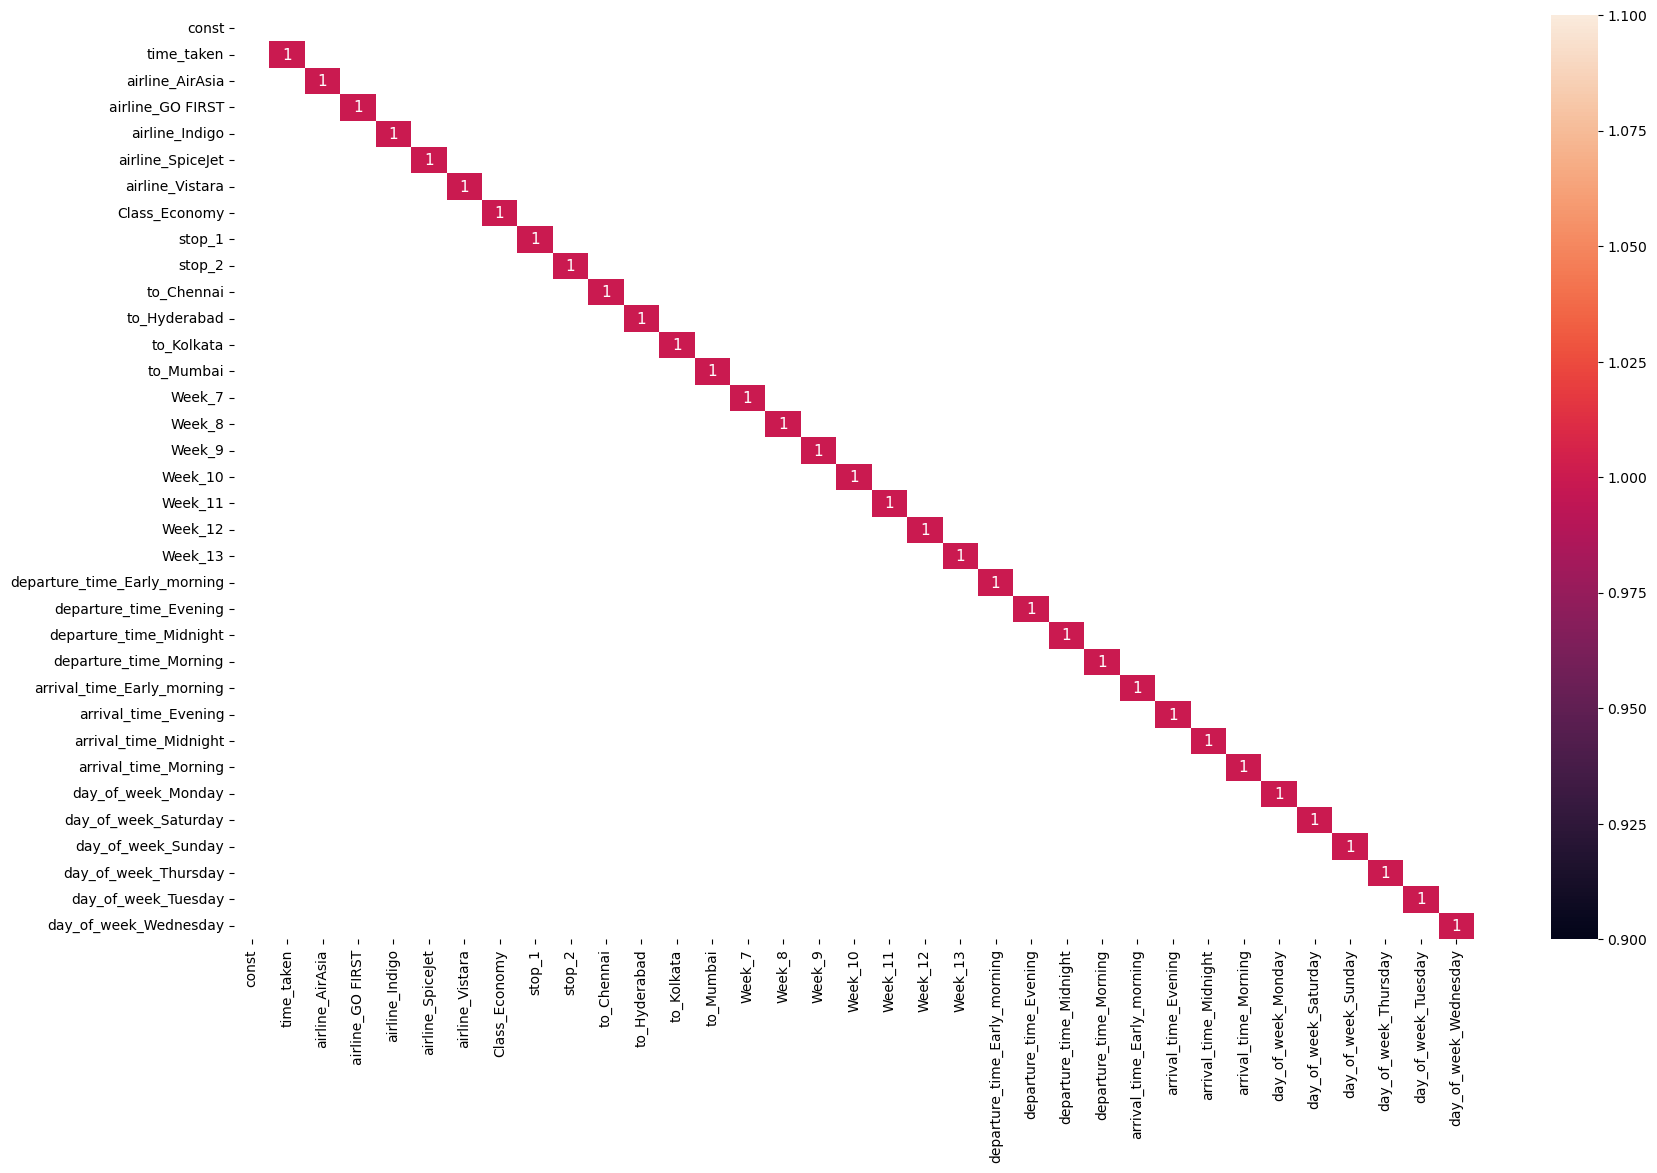

In [157]:
plt.figure(figsize = (20,12))
sns.heatmap(X_train.corr()[np.abs(X_train.corr()) > 0.8], annot = True, annot_kws = {"size": 11})

Interpretation: The above heatmap, show the no variables are having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation

# Building MLR Model using OLS Technique:

In [158]:
MLR_Model=sm.OLS(y_train.values.reshape(-1,1),X_train).fit()
print(MLR_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     6268.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:14:50   Log-Likelihood:            -2.3624e+05
No. Observations:               22936   AIC:                         4.725e+05
Df Residuals:                   22901   BIC:                         4.728e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Interpretation:
R-squared (R²): The R-squared value is a measure of how well the independent variables explain the variation in the dependent variable. In your case, the R-squared value is 0.903, which means that approximately 90.3% of the variability in the dependent variable 'y' can be explained by the independent variables included in the model. This is a high R-squared value, indicating a good fit.

Adjusted R-squared (Adj. R²): This is a modified version of R-squared that takes into account the number of independent variables in the model. It penalizes the inclusion of irrelevant variables. Your adjusted R-squared value is also 0.903, which is very close to the R-squared value, suggesting that the variables in your model are relevant.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model. In your case, the F-statistic is 6268, and the associated p-value (Prob (F-statistic)) is very close to zero (0.00). This indicates that the regression model as a whole is statistically significant.

Coefficients: The table lists the coefficients for each independent variable in the model. These coefficients represent the estimated effect of each independent variable on the dependent variable 'y' while holding all other variables constant.

For example, the coefficient for 'time_taken' is 91.5430. This suggests that, on average, for each unit increase in 'time_taken,' the dependent variable 'y' is expected to increase by 91.5430 units, assuming all other variables are held constant.
P-values (P>|t|): The p-values associated with each coefficient test whether the corresponding independent variable has a statistically significant effect on the dependent variable. A small p-value (typically less than 0.05) indicates that the variable is statistically significant.

For example, 'time_taken' has a p-value of 0.000, which is less than 0.05. This indicates that 'time_taken' is statistically significant in predicting 'y.'
Confidence Intervals ( [0.025, 0.975] ): The confidence intervals provide a range within which the true population parameter (the coefficient) is likely to fall. The values in square brackets represent the lower and upper bounds of the confidence interval.

For example, for the 'const' coefficient, the confidence interval is [3.74e+04, 3.87e+04]. This means that we are 95% confident that the true value of the 'const' coefficient falls within this range.
Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis: These statistics are related to the normality and autocorrelation of the residuals. They are used to assess the assumptions of the regression model. A significant Omnibus test (p < 0.05) suggests that the residuals are not normally distributed.

Cond. No. (Condition Number): The condition number assesses multicollinearity (high correlation) among the independent variables. A high condition number indicates potential multicollinearity issues.

# checking which features are multicollinear with the help of VIF technique:

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
df_full_feature_vif = X_train.select_dtypes(include=[np.number])

In [161]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_full_feature_vif.values, i) for i in range(df_full_feature_vif.shape[1])]
vif["Features"] = df_full_feature_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,49.266149,const
1,4.244054,Week_8
2,4.167653,Week_9
3,4.111489,Week_10
4,3.949655,Week_7
5,3.429749,Week_11
6,3.339578,Week_12
7,2.530131,Week_13
8,1.942798,time_taken
9,1.887023,Class_Economy


From above table we can infer that the VIF for every feature seems lesser than 5. As a result of which there is the presence
of only moderate multicolinearity. So we can ignore and move forward with model building.¶

# Checking for Linear Relationship between Dependent and Independent Variable:

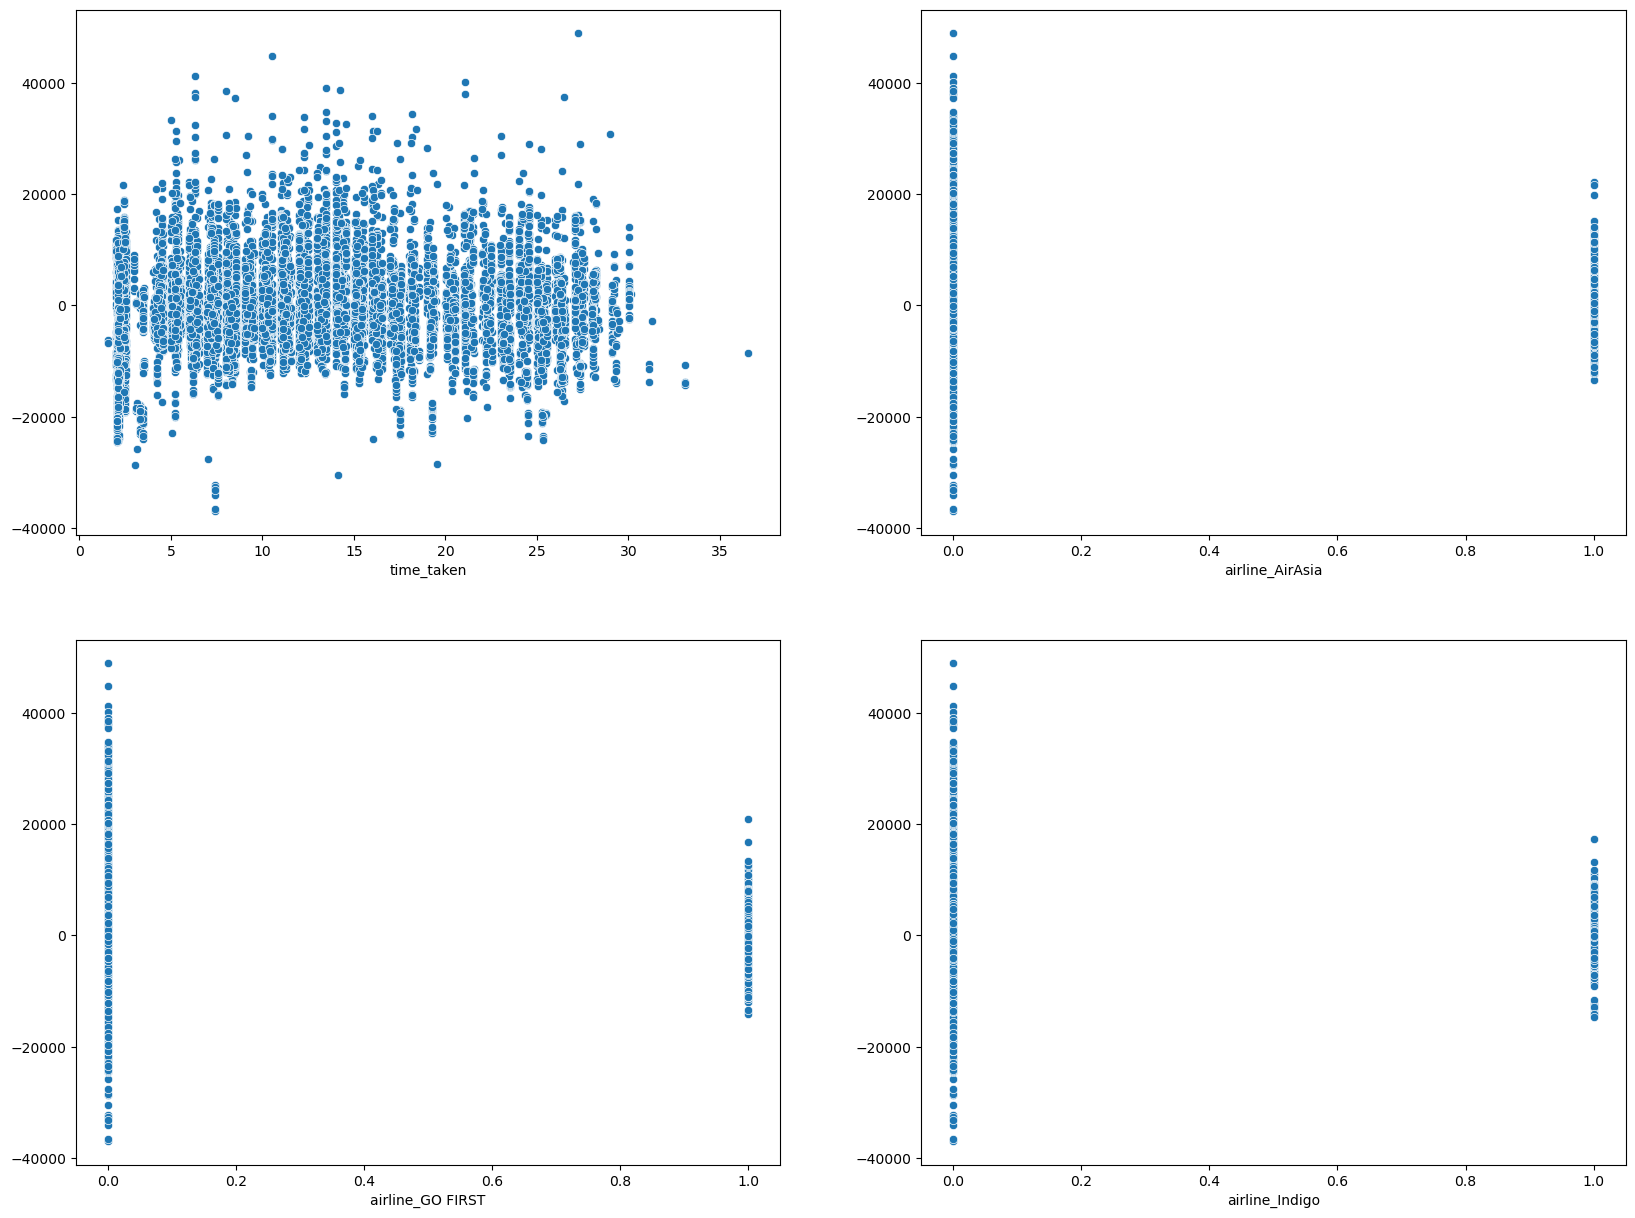

In [162]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], MLR_Model.resid , ax=subplot)

plt.show()

Interpretation: The above plots show specific pattern except time_taken column, implies that there is linearity present in the time_taken column only.

In [163]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [164]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_Model.resid, MLR_Model.model.exog)
lzip(name, test[2:])

[('f-value', 145.7805769290128), ('p-value', 0.0)]

Interpretation: We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

# Checking for Normality in Residuals:

In [165]:
from scipy import stats
from scipy.stats import shapiro

In [166]:
#With the help of Shapiro-wilk test we are looking for normality in Residuals:
stat, p_value = shapiro(MLR_Model.resid)


print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9882696270942688
P-Value: 4.85474387901322e-39


Interpretation:

Given the small p-value of approximately 4.85e-39, you can make the following interpretation:

The null hypothesis (often denoted as H0) is typically a statement of no effect or no difference. In this context, it suggests that there is no significant effect or relationship between the variables being tested.

The small p-value indicates that the observed test statistic is highly unlikely to occur if the null hypothesis were true. In other words, the results are inconsistent with the idea that there is no effect or relationship.

Therefore, you would typically reject the null hypothesis in favor of the alternative hypothesis (often denoted as Ha), which implies that there is a significant effect or relationship.

The smaller the p-value, the stronger the evidence against the null hypothesis. In this case, the p-value is extremely small, indicating very strong evidence against the null hypothesis.

# Now Creating generalized functions to calculate various metrics for models:

Create a generalized function to calculate the RMSE for train and test set.

In [167]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [168]:
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

Create a generalized function to calculate the MAPE for test set.

In [169]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [170]:
def get_score(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

Create a generalized function to create a dataframe containing the scores from all the models

In [171]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    
    global score_card

    
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [173]:
# initiate linear regression model
linreg = LinearRegression()

MLR_model = linreg.fit(X_train, y_train)

MLR_model.score(X_train, y_train)

0.9029704121605248

In [174]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  7193.8773
RMSE on test set:  7162.961
Difference between RMSE on train and test set:  30.916299999999865


interpretation: RMSE on the training set is 7193.8773, while on the test set it is 7162.961. We can see that there is very minimal difference in the RMSE of the train and the test set. This implies that our model is normal-fitted.

In [175]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.90297,0.902822,7162.961,52.989269


# Gradient Descent

Build MLR model using SGD method.

In [176]:
from sklearn.linear_model import SGDRegressor

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 7287.3204
RMSE on test set: 7261.4663


In [177]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500


# Regularization

# Ridge Regression

Build regression model using Ridge Regression for alpha = 1.

In [178]:
from sklearn.linear_model import Ridge

# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 7162.8346


In [179]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770


Build regression model using Ridge Regression for alpha = 2.

In [180]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 7162.7379


In [181]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770
3,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.7379,52.922723


# Lasso Regression

In [182]:
from sklearn.linear_model import Lasso
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 7162.9573


In [183]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770
3,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.7379,52.922723
4,Lasso Regression,0.01,-,0.902970,0.902822,7162.9573,52.988338


# Elastic Net Regression:

In [184]:
from sklearn.linear_model import ElasticNet
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 9577.2128


In [185]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770
3,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.7379,52.922723
4,Lasso Regression,0.01,-,0.902970,0.902822,7162.9573,52.988338
5,Elastic Net Regression,0.1,0.01,0.826547,0.826281,9577.2128,69.182167


# Grid Search CV

Find optimal value of alpha for Ridge Regression

In [186]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 7162.947


In [187]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770
3,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.7379,52.922723
4,Lasso Regression,0.01,-,0.902970,0.902822,7162.9573,52.988338
5,Elastic Net Regression,0.1,0.01,0.826547,0.826281,9577.2128,69.182167
6,Ridge Regression (using GridSearchCV),0.1,-,0.902970,0.902822,7162.9470,52.985899


Find optimal value of alpha for Lasso Regression

In [188]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1} 

RMSE on test set: 7162.7346


In [189]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770
3,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.7379,52.922723
4,Lasso Regression,0.01,-,0.902970,0.902822,7162.9573,52.988338
5,Elastic Net Regression,0.1,0.01,0.826547,0.826281,9577.2128,69.182167
6,Ridge Regression (using GridSearchCV),0.1,-,0.902970,0.902822,7162.9470,52.985899
7,Lasso Regression (using GridSearchCV),1,-,0.902967,0.902818,7162.7346,52.897285


Find optimal value of alpha for Elastic Net Regression

In [190]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)



# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 7162.7519


In [191]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.902970,0.902822,7162.9610,52.989269
1,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.4663,51.126500
2,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.8346,52.955770
3,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.7379,52.922723
4,Lasso Regression,0.01,-,0.902970,0.902822,7162.9573,52.988338
5,Elastic Net Regression,0.1,0.01,0.826547,0.826281,9577.2128,69.182167
6,Ridge Regression (using GridSearchCV),0.1,-,0.902970,0.902822,7162.9470,52.985899
7,Lasso Regression (using GridSearchCV),1,-,0.902967,0.902818,7162.7346,52.897285
8,Elastic Net Regression (using GridSearchCV),0.0001,0.2,0.902969,0.902821,7162.7519,52.928137


Display the score card summary

In [192]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),1,-,0.902967,0.902818,7162.734600,52.897285
1,Ridge Regression (with alpha = 2),2,-,0.902969,0.902821,7162.737900,52.922723
2,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.902969,0.902821,7162.751900,52.928137
3,Ridge Regression (with alpha = 1),1,-,0.902970,0.902822,7162.834600,52.955770
4,Ridge Regression (using GridSearchCV),0.100000,-,0.902970,0.902822,7162.947000,52.985899
5,Lasso Regression,0.01,-,0.902970,0.902822,7162.957300,52.988338
6,Linear Regression,-,-,0.902970,0.902822,7162.961000,52.989269
7,Linear Regression (using SGD),-,-,0.900433,0.900281,7261.466300,51.126500
8,Elastic Net Regression,0.1,0.01,0.826547,0.826281,9577.212800,69.182167


#  Random Forest:

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [194]:
RF_Model=RandomForestRegressor(n_estimators=650,random_state=102,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.9804501011988308
Test RMSE: 3241.7075804996316


# Performing RandomsearchCV on Random Forest Regression:

In [195]:
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [196]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ",r2_score(y_train.values, y_train_pred))
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ",r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  2237.5737252524304
R-Squared:  0.9906128698375887
Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  3229.4213509175333
R-Squared:  0.9805980105117555


We can see that Random forest model after Hyperparameter Tuning is giving lower Test RMSE. Thus is better comparatively.

# Decision Tree:

In [197]:
from sklearn.tree import DecisionTreeRegressor

In [198]:
from sklearn.metrics import r2_score
DT_Model=DecisionTreeRegressor()
DT_Model.fit(X_train,y_train)
y_predict=DT_Model.predict(X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.96268759553349
Test RMSE: 4478.454827604075


CONCLUSION: We have done the following above model building before feature selection intentionally in order to find out which model is performing the best by including all the features. We found that Random_Forest is giving the best R2 score with lowest RMSE. Thus is the best model.

# Performing GridSearchCV on Decision Tree Regression:

In [199]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [200]:
 # Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ",np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  2544.6690022345965
R-Squared:  0.9878593837589269
Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  4115.1338740886595
R-Squared:  0.9684960668604052


We can see that Decision Tree model after Hyperparameter Tuning is giving lower Test RMSE. Thus is better comparatively.

# Feature Selection:

In [201]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [202]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select =None)

# fit the RFE model on the training dataset using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'Class_Economy', 'stop_1', 'stop_2', 'to_Chennai',
       'to_Kolkata', 'Week_7', 'Week_8', 'Week_9', 'Week_10', 'Week_11',
       'Week_12', 'Week_13', 'departure_time_Early_morning'],
      dtype='object')


In [203]:
X_train.columns

Index(['const', 'time_taken', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'Class_Economy', 'stop_1', 'stop_2', 'to_Chennai', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'Week_7', 'Week_8', 'Week_9', 'Week_10',
       'Week_11', 'Week_12', 'Week_13', 'departure_time_Early_morning',
       'departure_time_Evening', 'departure_time_Midnight',
       'departure_time_Morning', 'arrival_time_Early_morning',
       'arrival_time_Evening', 'arrival_time_Midnight', 'arrival_time_Morning',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [204]:
New_X_train=X_train[['airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'Class_Economy', 'stop_1', 'stop_2', 'to_Chennai',
       'to_Kolkata', 'Week_7', 'Week_8', 'Week_9', 'Week_10', 'Week_11',
       'Week_12', 'Week_13', 'departure_time_Early_morning']]

In [205]:
New_X_train.shape

(22936, 17)

In [206]:
New_X_test=X_test[['airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'Class_Economy', 'stop_1', 'stop_2', 'to_Chennai',
       'to_Kolkata', 'Week_7', 'Week_8', 'Week_9', 'Week_10', 'Week_11',
       'Week_12', 'Week_13', 'departure_time_Early_morning']]

In [207]:
New_X_test.shape

(9830, 17)

# Now Creating generalized functions to calculate various metrics for models:

Create a generalized function to calculate the RMSE for train and test set.

In [208]:
def get_train_rmse(model):
    train_pred = model.predict(New_X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [209]:
def get_test_rmse(model):
    test_pred = model.predict(New_X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

Create a generalized function to calculate the MAPE for test set.

In [210]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(New_X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [211]:
def get_score(model):
    r_sq = model.score(New_X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

Create a generalized function to create a dataframe containing the scores from all the models

In [212]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    
    global score_card

    
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# Building a MLR model on a training dataset:

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [214]:
# initiate linear regression model
linreg = LinearRegression()

MLR_model = linreg.fit(New_X_train, y_train)

MLR_model.score(New_X_train, y_train)

0.9006806280454612

In [215]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  7278.2659
RMSE on test set:  7233.1244
Difference between RMSE on train and test set:  45.14150000000063


Interpretation: RMSE on the training set is 7278.2659, while on the test set it is 7233.1244. We can see that there is very minimal difference in the RMSE of the train and the test set. This implies that our model is normally fitted.

In [216]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229


# Gradient Descent:

Build MLR model using SGD method.

In [217]:
from sklearn.linear_model import SGDRegressor

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(New_X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 7280.3751
RMSE on test set: 7234.4433


In [218]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065


# Regularization:

# Ridge Regression

Build regression model using Ridge Regression for alpha = 1.

In [219]:
from sklearn.linear_model import Ridge

# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(New_X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 7233.0015


In [220]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650


Build regression model using Ridge Regression for alpha = 2

In [221]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(New_X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 7232.9036


In [222]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650
3,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.9036,52.556354


Interpretation: After applying the ridge regression with alpha equal to two, the RMSE value is same.

# Lasso Regression:

In [223]:
from sklearn.linear_model import Lasso
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(New_X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 7233.1219


In [224]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650
3,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.9036,52.556354
4,Lasso Regression,0.01,-,0.900681,0.900529,7233.1219,52.620654


# Elastic Net Regression:

In [225]:
from sklearn.linear_model import ElasticNet
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(New_X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 9635.567


In [226]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650
3,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.9036,52.556354
4,Lasso Regression,0.01,-,0.900681,0.900529,7233.1219,52.620654
5,Elastic Net Regression,0.1,0.01,0.823889,0.823620,9635.5670,73.125789


# Grid Search CV:

Find optimal value of alpha for Ridge Regression:

In [227]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 7233.111


In [228]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650
3,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.9036,52.556354
4,Lasso Regression,0.01,-,0.900681,0.900529,7233.1219,52.620654
5,Elastic Net Regression,0.1,0.01,0.823889,0.823620,9635.5670,73.125789
6,Ridge Regression (using GridSearchCV),0.1,-,0.900681,0.900529,7233.1110,52.617959


Find optimal value of alpha for Lasso Regression:

In [229]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.01} 

RMSE on test set: 7233.1219


In [230]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650
3,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.9036,52.556354
4,Lasso Regression,0.01,-,0.900681,0.900529,7233.1219,52.620654
5,Elastic Net Regression,0.1,0.01,0.823889,0.823620,9635.5670,73.125789
6,Ridge Regression (using GridSearchCV),0.1,-,0.900681,0.900529,7233.1110,52.617959
7,Lasso Regression (using GridSearchCV),0.01,-,0.900681,0.900529,7233.1219,52.620654


Find optimal value of alpha for Elastic Net Regression:

In [231]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)



# fit the model on X_train and y_train using fit()
enet_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 7232.9181


In [232]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.900681,0.900529,7233.1244,52.621229
1,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.4433,53.073065
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.0015,52.588650
3,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.9036,52.556354
4,Lasso Regression,0.01,-,0.900681,0.900529,7233.1219,52.620654
5,Elastic Net Regression,0.1,0.01,0.823889,0.823620,9635.5670,73.125789
6,Ridge Regression (using GridSearchCV),0.1,-,0.900681,0.900529,7233.1110,52.617959
7,Lasso Regression (using GridSearchCV),0.01,-,0.900681,0.900529,7233.1219,52.620654
8,Elastic Net Regression (using GridSearchCV),0.0001,0.2,0.900679,0.900528,7232.9181,52.561677


Display the score card summary:

In [233]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 2),2,-,0.900679,0.900527,7232.903600,52.556354
1,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.900679,0.900528,7232.918100,52.561677
2,Ridge Regression (with alpha = 1),1,-,0.900680,0.900528,7233.001500,52.588650
3,Ridge Regression (using GridSearchCV),0.100000,-,0.900681,0.900529,7233.111000,52.617959
4,Lasso Regression,0.01,-,0.900681,0.900529,7233.121900,52.620654
5,Lasso Regression (using GridSearchCV),0.010000,-,0.900681,0.900529,7233.121900,52.620654
6,Linear Regression,-,-,0.900681,0.900529,7233.124400,52.621229
7,Linear Regression (using SGD),-,-,0.900623,0.900471,7234.443300,53.073065
8,Elastic Net Regression,0.1,0.01,0.823889,0.823620,9635.567000,73.125789


# Random Forest:

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF_Model=RandomForestRegressor(n_estimators=650,random_state=102,min_samples_leaf=.0001)
RF_Model.fit(New_X_train,y_train)
y_predict=RF_Model.predict(New_X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.9422418959579341
Test RMSE: 5571.960693657564


# Performing RandomsearchCV on Random Forest Regression:

In [235]:
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(New_X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [236]:
#Predicting train and test results
y_train_pred = random_regressor.predict(New_X_train)
y_test_pred = random_regressor.predict(New_X_test)
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ",r2_score(y_train.values, y_train_pred))
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ",r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  5512.646344392263
R-Squared:  0.9430231551329672
Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  5566.562893982465
R-Squared:  0.9423537473084456


We can see that Random forest model after Hyperparameter Tuning is giving lower Test RMSE. Thus is better comparatively.

# Decision Tree:

In [237]:
from sklearn.tree import DecisionTreeRegressor

In [238]:
from sklearn.metrics import r2_score
DT_Model=DecisionTreeRegressor()
DT_Model.fit(New_X_train,y_train)
y_predict=DT_Model.predict(New_X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.9423382529556642
Test RMSE: 5567.310943424973


Performing GridSearchCV on Decision Tree Regression:

In [239]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(New_X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [240]:
 # Predicting train and test results
y_train_pred = tree.predict(New_X_train)
y_test_pred = tree.predict(New_X_test)
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ",np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  5509.769133047414
R-Squared:  0.9430826153751525
Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  5567.248963881069
R-Squared:  0.9423395368174515


We can see that Decision model after Hyperparameter Tuning is giving similar Test RMSE results.

#CONCLUSION: We have finally performed feature selection over the entire features in order to get the best features. Feature selection is generally done as it decreases over-fitting. Fewer redundant data means fewer chances of making decisions based on noise.Reduces Training Time. Less data means quicker algorithms.

# From the above models build, we found Random Forest model using Hyperparameter tuning to be working best on the selected features.